# Embedding Combination Analysis

## Data Setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import MultiLabelBinarizer

In [3]:
#load predicted scores from embeddinggenerationandprediction.ipynb
scoredf = pd.read_csv("data/predictedscores.csv")

In [4]:
#view df
scoredf.head()

,Unnamed: 0,relationships,embedding,score_rf,score_xgb,score_svm,score_nb,score_nn,score_nn_binary
0,0,['low pregnancies'],"[0.3559499979019165, 0.017154032364487648, -0....",0,0,0,0,0.170097,0
1,1,['normal pregnancies'],"[0.21517100930213928, 0.09962455183267593, 0.1...",0,0,0,0,0.298908,0
2,2,['high pregnancies'],"[0.1451621651649475, 0.012034144252538681, -0....",0,0,0,0,0.517344,1
3,3,['low glucose'],"[0.07380708307027817, 0.07721707224845886, 0.0...",0,0,0,0,0.121242,0
4,4,['normal glucose'],"[0.4024839997291565, -0.0163387693464756, -0.0...",0,0,0,0,0.048572,0


In [5]:
#one hot encode for relationship combinations 
scoredf['relationships'] = scoredf['relationships'].apply(lambda x: eval(x))

mlb = MultiLabelBinarizer()
expanded_data = scoredf.join(pd.DataFrame(mlb.fit_transform(scoredf.pop('relationships')),
                                       columns=mlb.classes_,
                                       index=scoredf.index))

expanded_data.head()

,Unnamed: 0,embedding,score_rf,score_xgb,score_svm,score_nb,score_nn,score_nn_binary,high age,high blood pressure,...,low pregnancies,low skin thickness,normal age,normal blood pressure,normal bmi,normal diabetes pedigree function,normal glucose,normal insulin,normal pregnancies,normal skin thickness
0,0,"[0.3559499979019165, 0.017154032364487648, -0....",0,0,0,0,0.170097,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,"[0.21517100930213928, 0.09962455183267593, 0.1...",0,0,0,0,0.298908,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,"[0.1451621651649475, 0.012034144252538681, -0....",0,0,0,0,0.517344,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,"[0.07380708307027817, 0.07721707224845886, 0.0...",0,0,0,0,0.121242,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,"[0.4024839997291565, -0.0163387693464756, -0.0...",0,0,0,0,0.048572,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [6]:
expanded_data.iloc[:,-24:]

,high age,high blood pressure,high bmi,high diabetes pedigree function,high glucose,high insulin,high pregnancies,high skin thickness,low age,low blood pressure,...,low pregnancies,low skin thickness,normal age,normal blood pressure,normal bmi,normal diabetes pedigree function,normal glucose,normal insulin,normal pregnancies,normal skin thickness
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,0,1,1,0,1,1,1,1,0,0,...,0,0,1,0,0,1,0,0,0,0
65531,1,1,1,0,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
65532,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
65533,0,1,1,1,1,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0


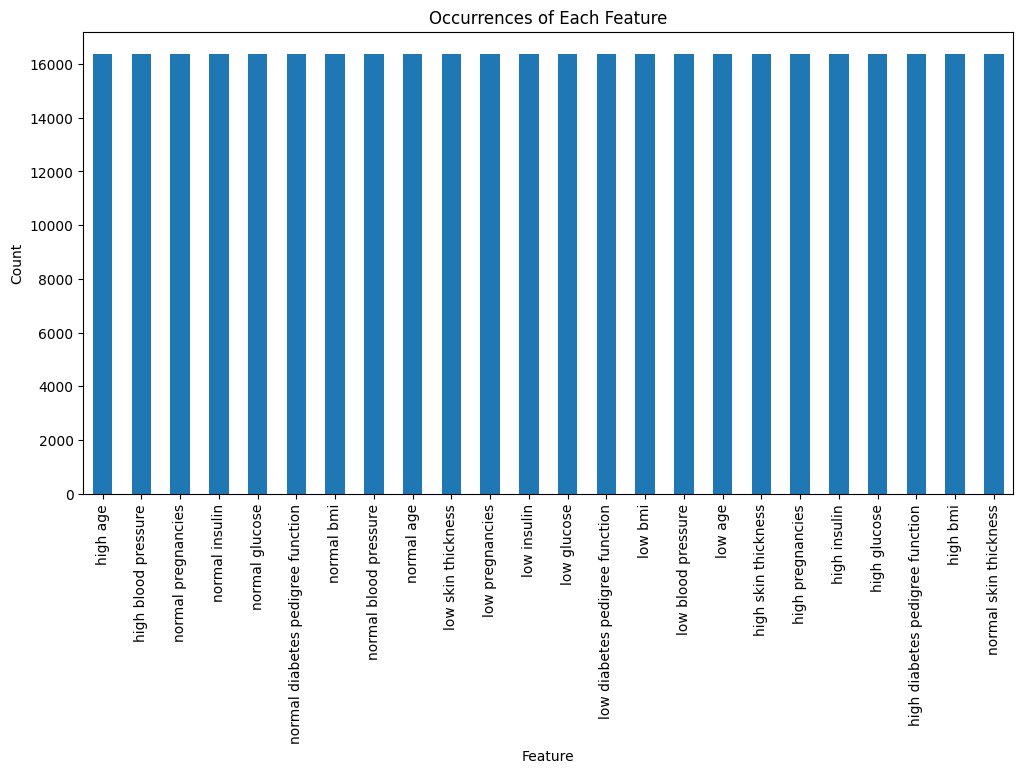

In [7]:
#plot occurance of each feature
feature_counts = expanded_data.iloc[:,-24:].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
feature_counts.plot(kind='bar')
plt.title('Occurrences of Each Feature')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()

In [8]:
feature_counts

high age                             16384
high blood pressure                  16384
normal pregnancies                   16384
normal insulin                       16384
normal glucose                       16384
normal diabetes pedigree function    16384
normal bmi                           16384
normal blood pressure                16384
normal age                           16384
low skin thickness                   16384
low pregnancies                      16384
low insulin                          16384
low glucose                          16384
low diabetes pedigree function       16384
low bmi                              16384
low blood pressure                   16384
low age                              16384
high skin thickness                  16384
high pregnancies                     16384
high insulin                         16384
high glucose                         16384
high diabetes pedigree function      16384
high bmi                             16384
normal skin

## Random Forest

In [9]:
#view descriptive statistics
print(expanded_data['score_rf'].describe())

count    65535.000000
mean         0.056992
std          0.231830
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: score_rf, dtype: float64


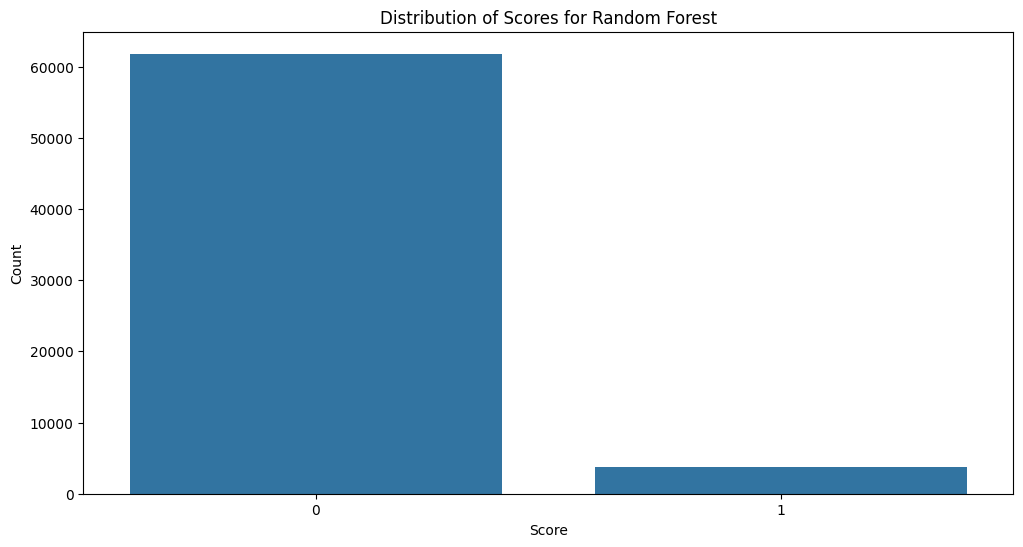

In [10]:
#bar chart of score distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='score_rf', data=expanded_data)
plt.title('Distribution of Scores for Random Forest')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [11]:
#view score distribution
expanded_data.loc[:,"score_rf"].value_counts()

score_rf
0    61800
1     3735
Name: count, dtype: int64

### Positive Prediction

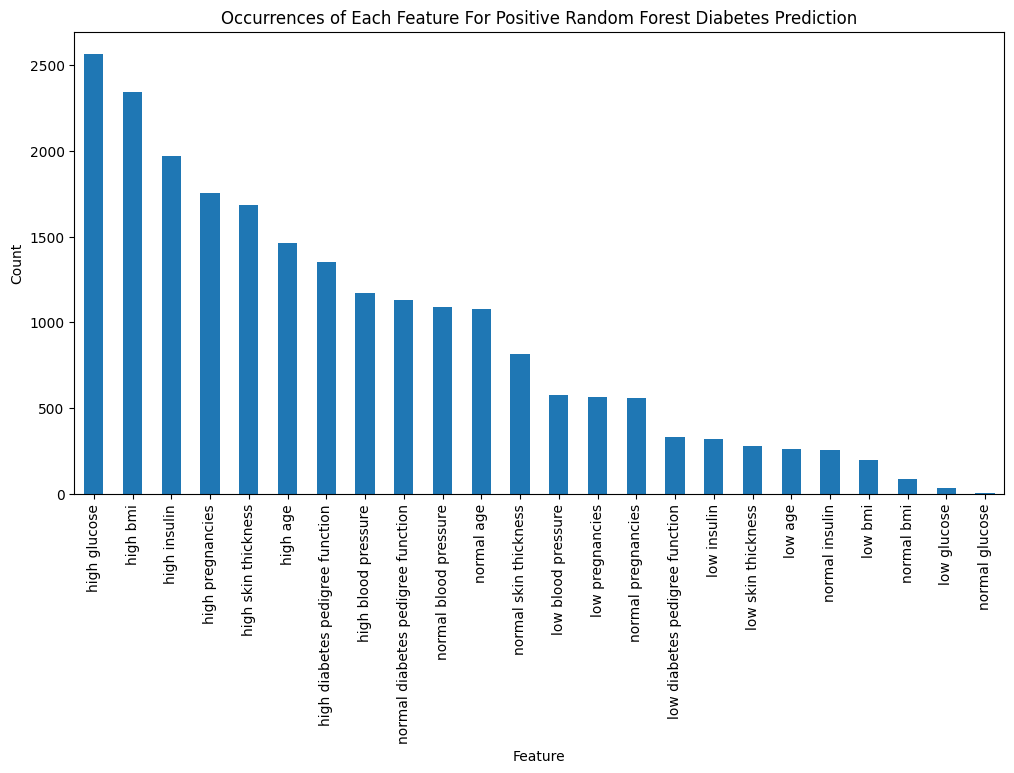

In [12]:
#bar chart of ocurrence of each feature for positive prediction
feature_counts = expanded_data[expanded_data['score_rf']==1].iloc[:,-24:].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
feature_counts.plot(kind='bar')
plt.title('Occurrences of Each Feature For Positive Random Forest Diabetes Prediction')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()

In [ ]:
#apriori analysis for positive prediction
expanded_rf = pd.concat([expanded_data.iloc[:,-24:], expanded_data['score_rf']], axis=1)

frequent_itemsets = apriori(expanded_rf, min_support=0.02, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

In [14]:
#sort rules by lift
rules[rules['consequents']==frozenset({'score_rf'})].sort_values(by="lift", ascending=False)[:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
15,"(high bmi, high glucose)",(score_rf),0.062501,0.056992,0.023484,0.375732,6.592670,0.019922,1.510582,0.904872
7,(high glucose),(score_rf),0.250004,0.056992,0.039155,0.156616,2.748017,0.024906,1.118124,0.848139
2,(high bmi),(score_rf),0.250004,0.056992,0.035767,0.143066,2.510270,0.021519,1.100444,0.802186
9,(high insulin),(score_rf),0.250004,0.056992,0.030014,0.120056,2.106527,0.015766,1.071668,0.700384
11,(high pregnancies),(score_rf),0.250004,0.056992,0.026719,0.106873,1.875206,0.012470,1.055849,0.622303
12,(high skin thickness),(score_rf),0.250004,0.056992,0.025711,0.102844,1.804524,0.011463,1.051108,0.594453
0,(high age),(score_rf),0.250004,0.056992,0.022324,0.089294,1.566777,0.008076,1.035469,0.482332
5,(high diabetes pedigree function),(score_rf),0.250004,0.056992,0.020600,0.082397,1.445761,0.006351,1.027686,0.411099


In [15]:
del rules

### Negative Prediction

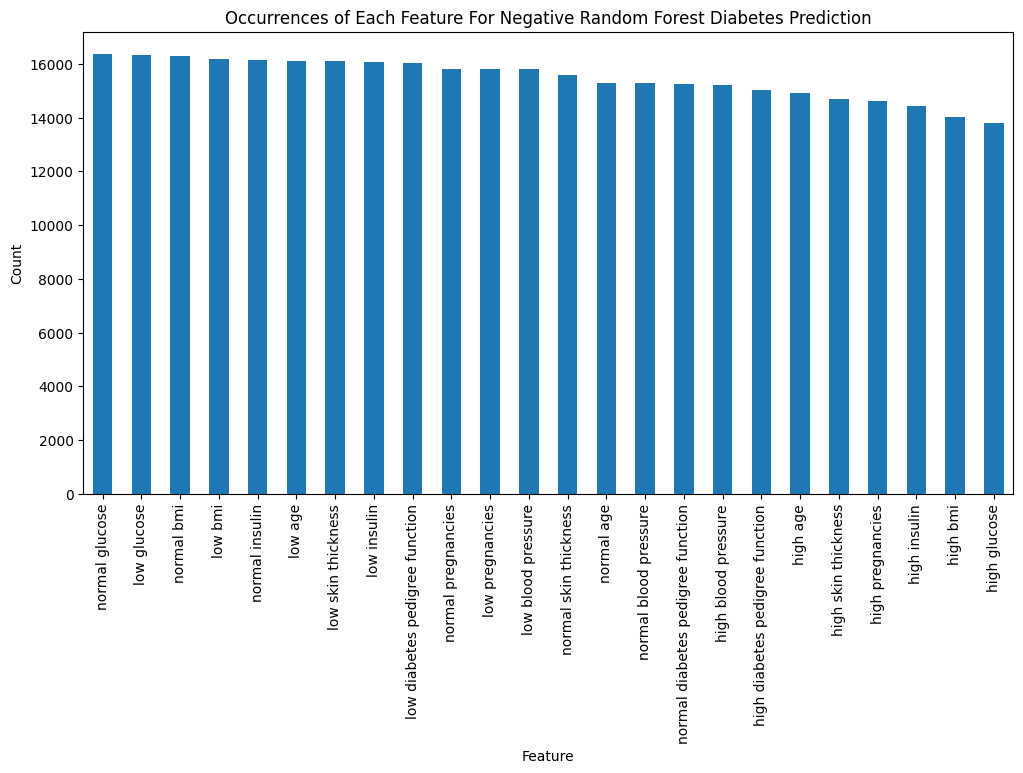

In [16]:
#bar chart of ocurrence of each feature for negative prediction
feature_counts = expanded_data[expanded_data['score_rf']==0].iloc[:,-24:].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
feature_counts.plot(kind='bar')
plt.title('Occurrences of Each Feature For Negative Random Forest Diabetes Prediction')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()

In [ ]:
#apriori analysis for negative prediction
expanded_rf_neg = pd.concat([expanded_data.iloc[:,-24:], 1-expanded_data['score_rf']], axis=1)

frequent_itemsets = apriori(expanded_rf_neg, min_support=0.02, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

In [18]:
#sort rules by lift
rules[rules['consequents']==frozenset({'score_rf'})].sort_values(by="lift", ascending=False)[:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
674,"(normal insulin, low glucose)",(score_rf),0.062501,0.943008,0.062501,1.0,1.060437,0.003562,inf,0.060792
867,"(normal bmi, normal insulin)",(score_rf),0.062501,0.943008,0.062501,1.0,1.060437,0.003562,inf,0.060792
679,"(normal pregnancies, low glucose)",(score_rf),0.062501,0.943008,0.062501,1.0,1.060437,0.003562,inf,0.060792
711,"(normal bmi, low insulin)",(score_rf),0.062501,0.943008,0.062501,1.0,1.060437,0.003562,inf,0.060792
475,"(low blood pressure, normal glucose)",(score_rf),0.062501,0.943008,0.062501,1.0,1.060437,0.003562,inf,0.060792
721,"(low insulin, normal glucose)",(score_rf),0.062501,0.943008,0.062501,1.0,1.060437,0.003562,inf,0.060792
661,"(normal bmi, low glucose)",(score_rf),0.062501,0.943008,0.062501,1.0,1.060437,0.003562,inf,0.060792
763,"(normal glucose, low pregnancies)",(score_rf),0.062501,0.943008,0.062501,1.0,1.060437,0.003562,inf,0.060792
631,"(low insulin, low glucose)",(score_rf),0.062501,0.943008,0.062501,1.0,1.060437,0.003562,inf,0.060792
789,"(normal bmi, low skin thickness)",(score_rf),0.062501,0.943008,0.062501,1.0,1.060437,0.003562,inf,0.060792


In [19]:
del rules

### Overall

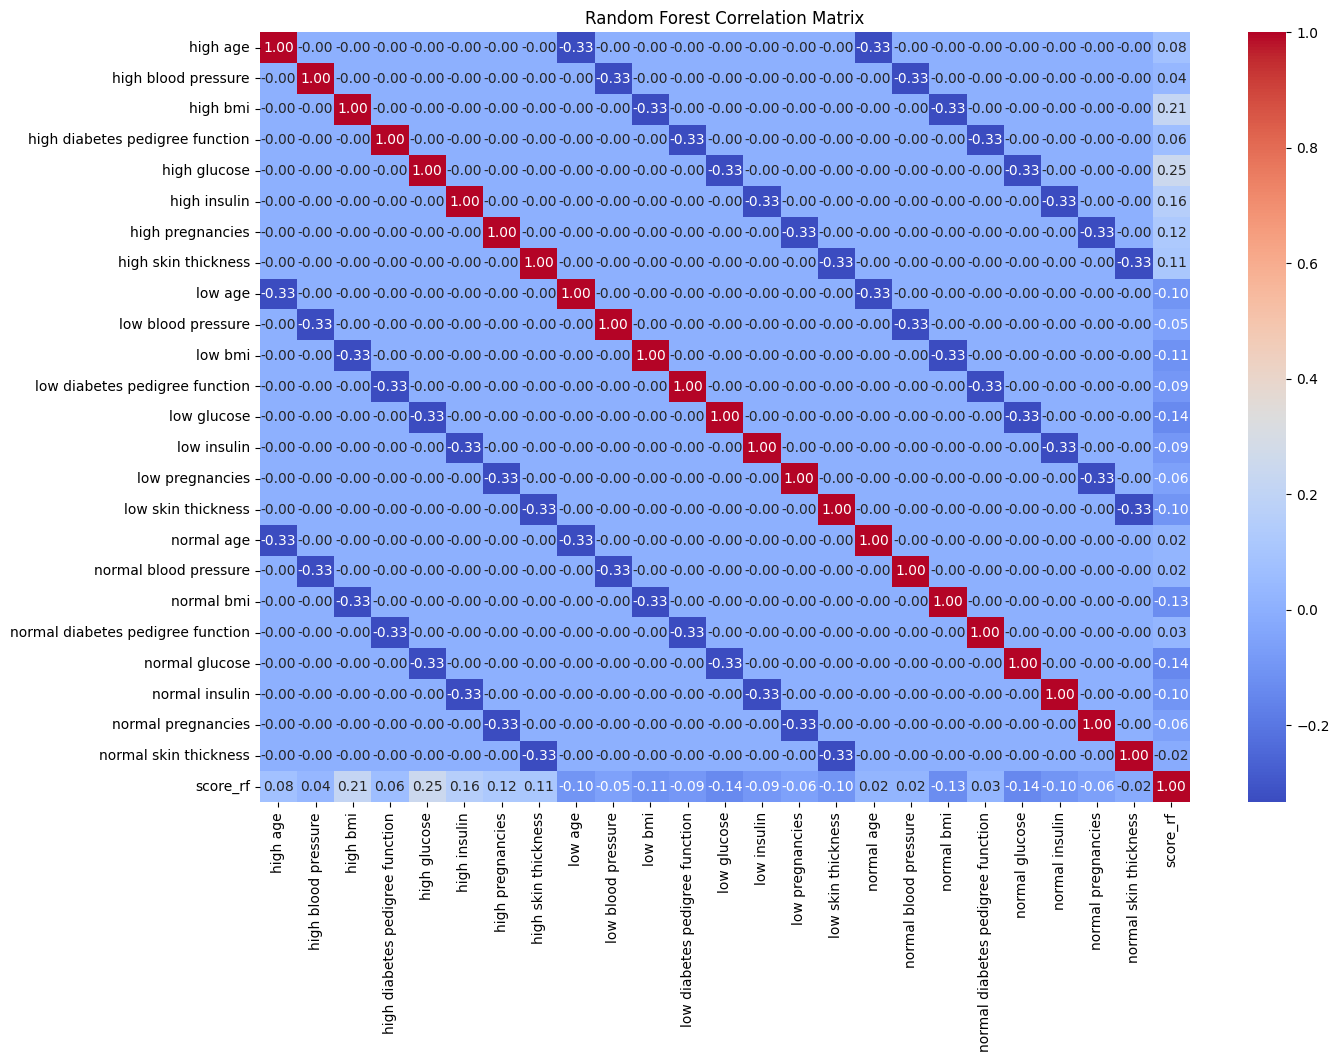

In [20]:
#display correlation matrix
correlation_matrix = expanded_rf.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Random Forest Correlation Matrix')
plt.show()

In [21]:
correlation_df = pd.DataFrame(correlation_matrix.iloc[-1][:-1])

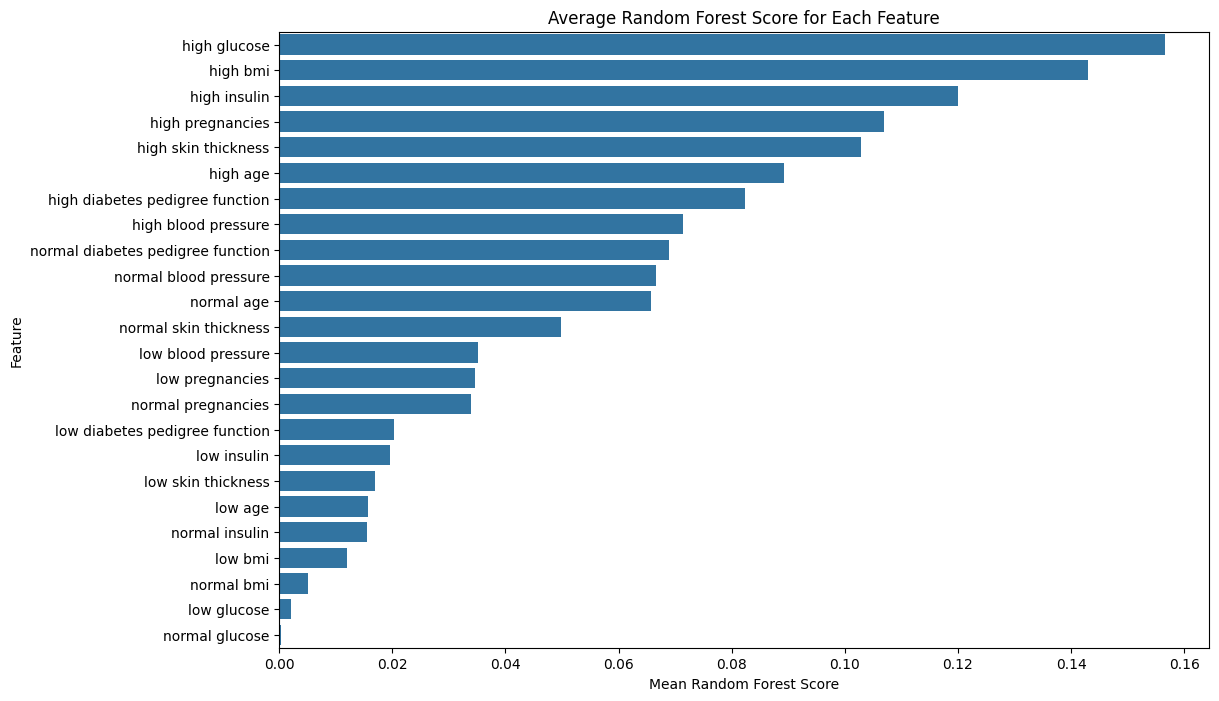

In [22]:
#bar chart of average score for each feature
mean_scores_rf = {}

feature_columns = expanded_data.iloc[:,-24:].columns
for feature in feature_columns:
    filtered_rows = expanded_data[expanded_data[feature] == 1]
    mean_score = filtered_rows['score_rf'].mean()
    mean_scores_rf[feature] = mean_score

mean_scores_df = pd.DataFrame(list(mean_scores_rf.items()), columns=['Feature', 'Mean Score'])


mean_scores_df = mean_scores_df.sort_values(by='Mean Score', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Mean Score', y='Feature', data=mean_scores_df)
plt.title('Average Random Forest Score for Each Feature')
plt.xlabel('Mean Random Forest Score')
plt.ylabel('Feature')
plt.show()

In [23]:
mean_scores_df

,Feature,Mean Score
4,high glucose,0.156616
2,high bmi,0.143066
5,high insulin,0.120056
6,high pregnancies,0.106873
7,high skin thickness,0.102844
0,high age,0.089294
3,high diabetes pedigree function,0.082397
1,high blood pressure,0.071350
19,normal diabetes pedigree function,0.068970
17,normal blood pressure,0.066589


## XGBoost

In [24]:
#view descriptive statistics
print(expanded_data['score_xgb'].describe())

count    65535.000000
mean         0.076768
std          0.266225
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: score_xgb, dtype: float64


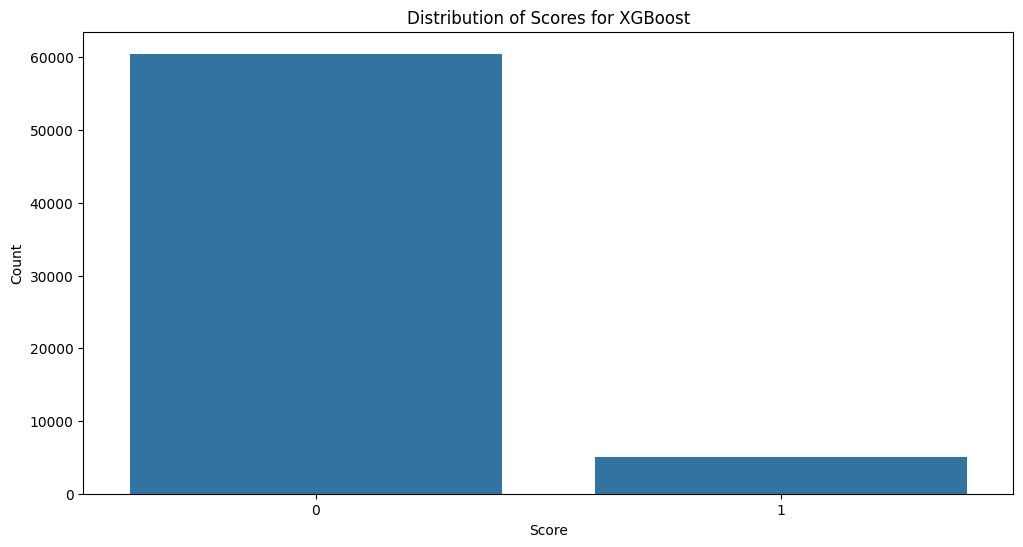

In [25]:
#bar chart of score distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='score_xgb', data=expanded_data)
plt.title('Distribution of Scores for XGBoost')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [26]:
#view score distribution
expanded_data.loc[:,"score_xgb"].value_counts()

score_xgb
0    60504
1     5031
Name: count, dtype: int64

### Positive Prediction

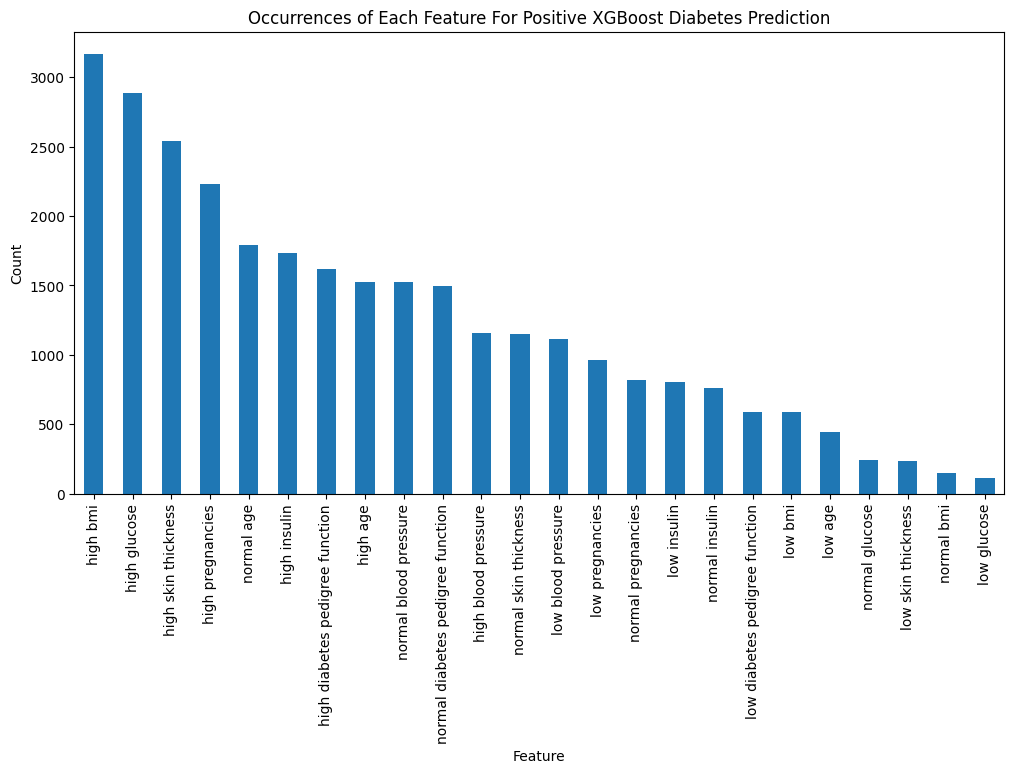

In [27]:
#bar chart of ocurrence of each feature for positive prediction
feature_counts = expanded_data[expanded_data['score_xgb']==1].iloc[:,-24:].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
feature_counts.plot(kind='bar')
plt.title('Occurrences of Each Feature For Positive XGBoost Diabetes Prediction')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()

In [ ]:
#apriori analysis for positive prediction
expanded_xgb = pd.concat([expanded_data.iloc[:,-24:], expanded_data['score_xgb']], axis=1)

frequent_itemsets = apriori(expanded_xgb, min_support=0.02, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

In [29]:
#sort rules by lift
rules[rules['consequents']==frozenset({'score_xgb'})].sort_values(by="lift", ascending=False)[:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
22,"(high bmi, high glucose)",(score_xgb),0.062501,0.076768,0.026551,0.424805,5.533607,0.021753,1.605075,0.873906
28,"(high bmi, high skin thickness)",(score_xgb),0.062501,0.076768,0.020279,0.324463,4.226531,0.015481,1.366663,0.814293
3,(high bmi),(score_xgb),0.250004,0.076768,0.048356,0.193420,2.519540,0.029164,1.144626,0.804140
7,(high glucose),(score_xgb),0.250004,0.076768,0.044038,0.176147,2.294539,0.024845,1.120628,0.752247
13,(high skin thickness),(score_xgb),0.250004,0.076768,0.038712,0.154846,2.017063,0.019520,1.092383,0.672310
11,(high pregnancies),(score_xgb),0.250004,0.076768,0.034028,0.136108,1.772980,0.014835,1.068689,0.581307
14,(normal age),(score_xgb),0.250004,0.076768,0.027329,0.109314,1.423950,0.008137,1.036540,0.396973
9,(high insulin),(score_xgb),0.250004,0.076768,0.026505,0.106018,1.381016,0.007313,1.032719,0.367863
5,(high diabetes pedigree function),(score_xgb),0.250004,0.076768,0.024750,0.098999,1.289585,0.005558,1.024674,0.299410
1,(high age),(score_xgb),0.250004,0.076768,0.023285,0.093140,1.213259,0.004093,1.018053,0.234366


In [30]:
del rules

### Negative Prediction

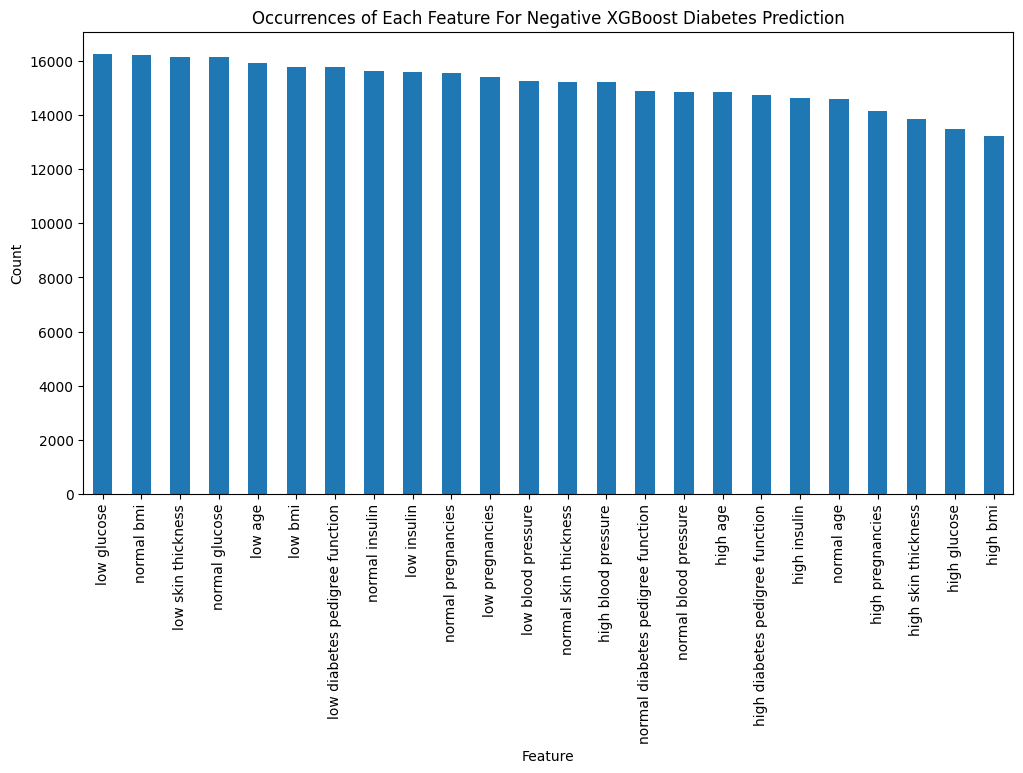

In [31]:
#bar chart of ocurrence of each feature for negative prediction
feature_counts = expanded_data[expanded_data['score_xgb']==0].iloc[:,-24:].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
feature_counts.plot(kind='bar')
plt.title('Occurrences of Each Feature For Negative XGBoost Diabetes Prediction')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()

In [ ]:
#apriori analysis for negative prediction
expanded_xgb_neg = pd.concat([expanded_data.iloc[:,-24:], 1-expanded_data['score_xgb']], axis=1)

frequent_itemsets = apriori(expanded_xgb_neg, min_support=0.02, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

In [33]:
#sort rules by lift
rules[rules['consequents']==frozenset({'score_xgb'})].sort_values(by="lift", ascending=False)[:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
844,"(normal bmi, normal glucose)",(score_xgb),0.062501,0.923232,0.062501,1.000000,1.083152,0.004798,inf,0.081886
652,"(normal bmi, low glucose)",(score_xgb),0.062501,0.923232,0.062501,1.000000,1.083152,0.004798,inf,0.081886
774,"(normal bmi, low skin thickness)",(score_xgb),0.062501,0.923232,0.062501,1.000000,1.083152,0.004798,inf,0.081886
668,"(normal pregnancies, low glucose)",(score_xgb),0.062501,0.923232,0.062501,1.000000,1.083152,0.004798,inf,0.081886
404,"(normal bmi, low age)",(score_xgb),0.062501,0.923232,0.062486,0.999756,1.082887,0.004783,314.442298,0.081646
636,"(low glucose, low skin thickness)",(score_xgb),0.062501,0.923232,0.062486,0.999756,1.082887,0.004783,314.442298,0.081646
504,"(low bmi, low glucose)",(score_xgb),0.062501,0.923232,0.062486,0.999756,1.082887,0.004783,314.442298,0.081646
784,"(normal glucose, low skin thickness)",(score_xgb),0.062501,0.923232,0.062470,0.999512,1.082623,0.004768,157.221149,0.081405
564,"(low glucose, low diabetes pedigree function)",(score_xgb),0.062501,0.923232,0.062455,0.999268,1.082358,0.004752,104.814099,0.081164
626,"(low glucose, low insulin)",(score_xgb),0.062501,0.923232,0.062440,0.999023,1.082094,0.004737,78.610575,0.080923


In [34]:
del rules

### Overall

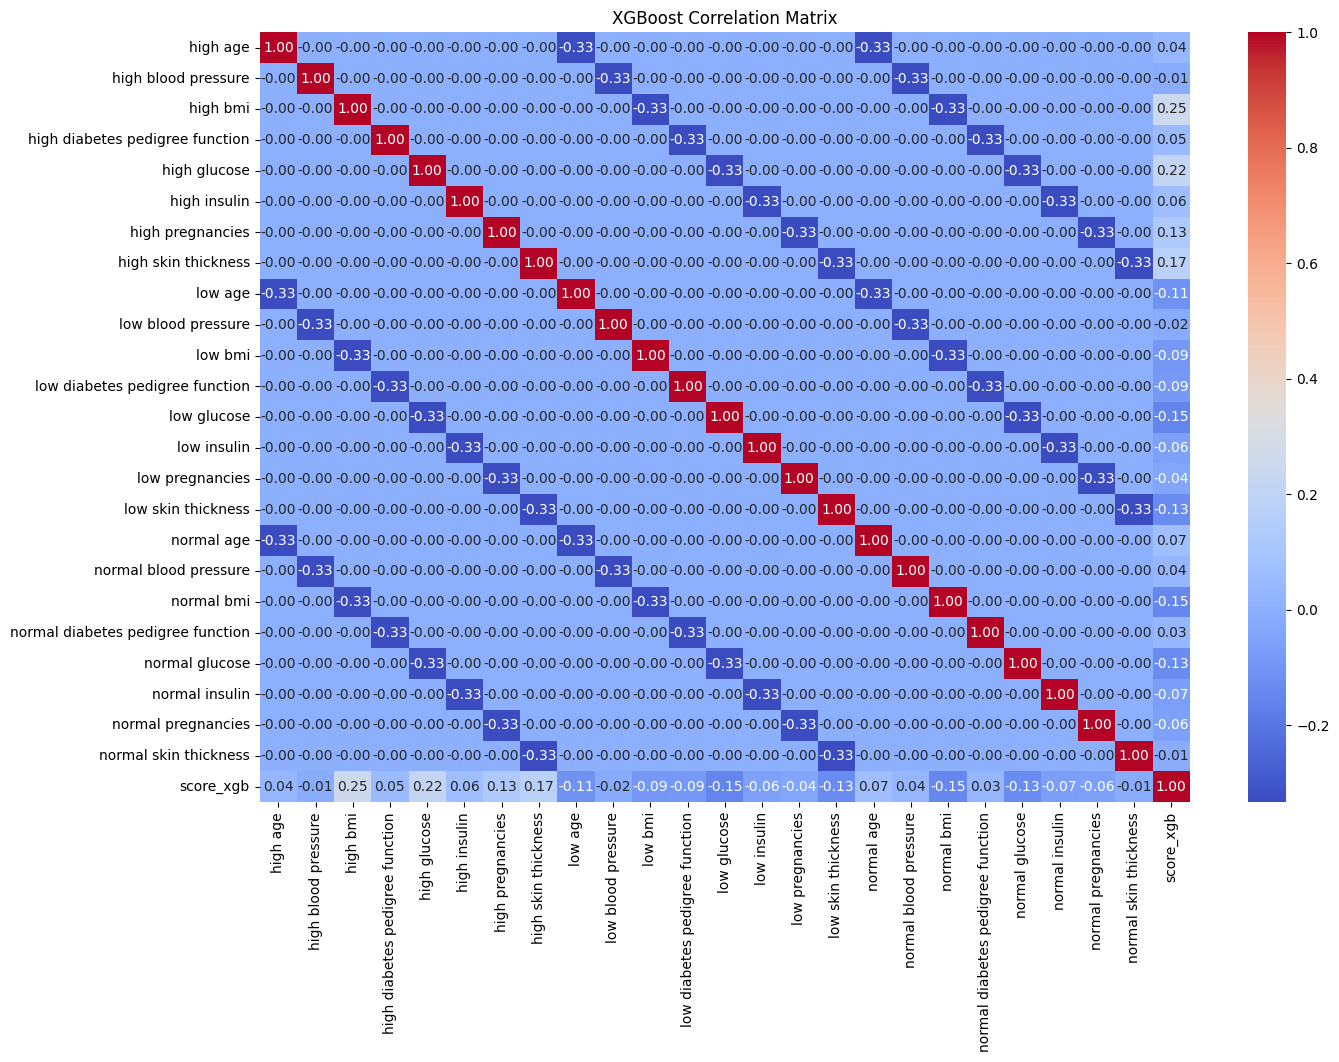

In [35]:
#display correlation matrix
correlation_matrix = expanded_xgb.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('XGBoost Correlation Matrix')
plt.show()

In [36]:
correlation_df[correlation_matrix.iloc[-1].name] = correlation_matrix.iloc[-1].iloc[:-1]

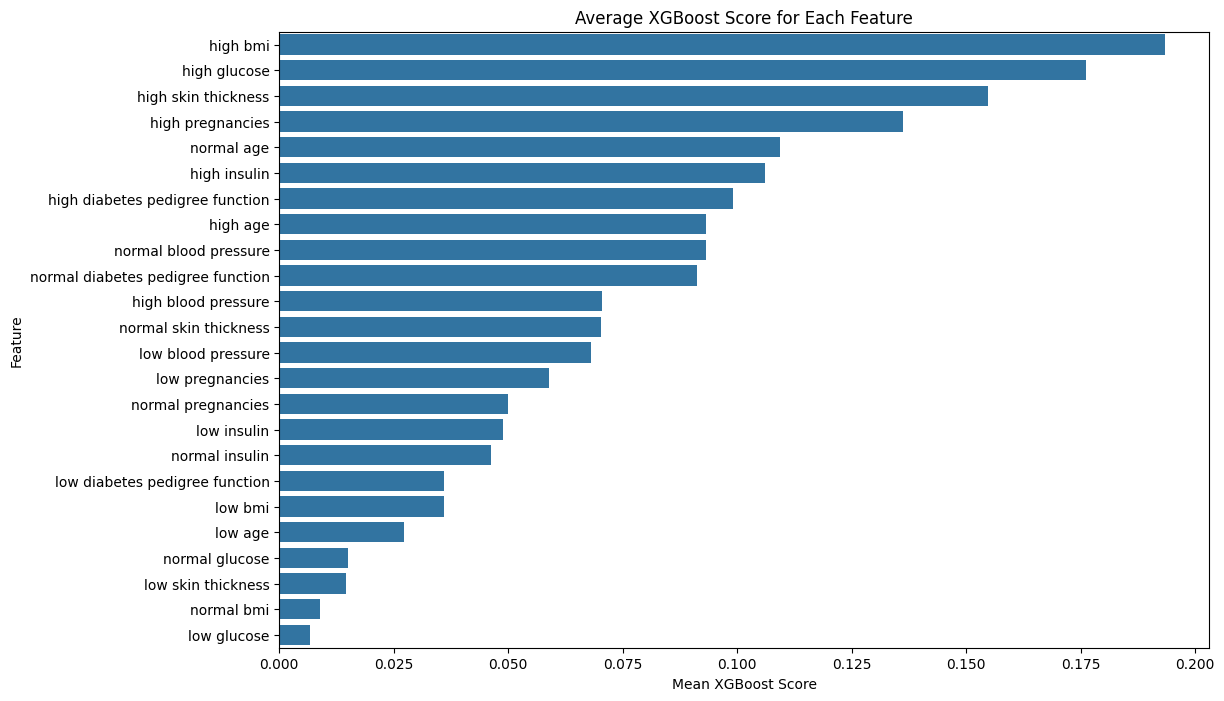

In [37]:
#bar chart of average score for each feature
mean_scores_xgb = {}

feature_columns = expanded_data.iloc[:,-24:].columns
for feature in feature_columns:
    filtered_rows = expanded_data[expanded_data[feature] == 1]
    mean_score = filtered_rows['score_xgb'].mean()
    mean_scores_xgb[feature] = mean_score

mean_scores_df = pd.DataFrame(list(mean_scores_xgb.items()), columns=['Feature', 'Mean Score'])


mean_scores_df = mean_scores_df.sort_values(by='Mean Score', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Mean Score', y='Feature', data=mean_scores_df)
plt.title('Average XGBoost Score for Each Feature')
plt.xlabel('Mean XGBoost Score')
plt.ylabel('Feature')
plt.show()

In [38]:
mean_scores_df

,Feature,Mean Score
2,high bmi,0.193420
4,high glucose,0.176147
7,high skin thickness,0.154846
6,high pregnancies,0.136108
16,normal age,0.109314
5,high insulin,0.106018
3,high diabetes pedigree function,0.098999
0,high age,0.093140
17,normal blood pressure,0.093079
19,normal diabetes pedigree function,0.091248


## SVM

In [39]:
#view descriptive statistics
print(expanded_data['score_svm'].describe())

count    65535.000000
mean         0.140826
std          0.347844
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: score_svm, dtype: float64


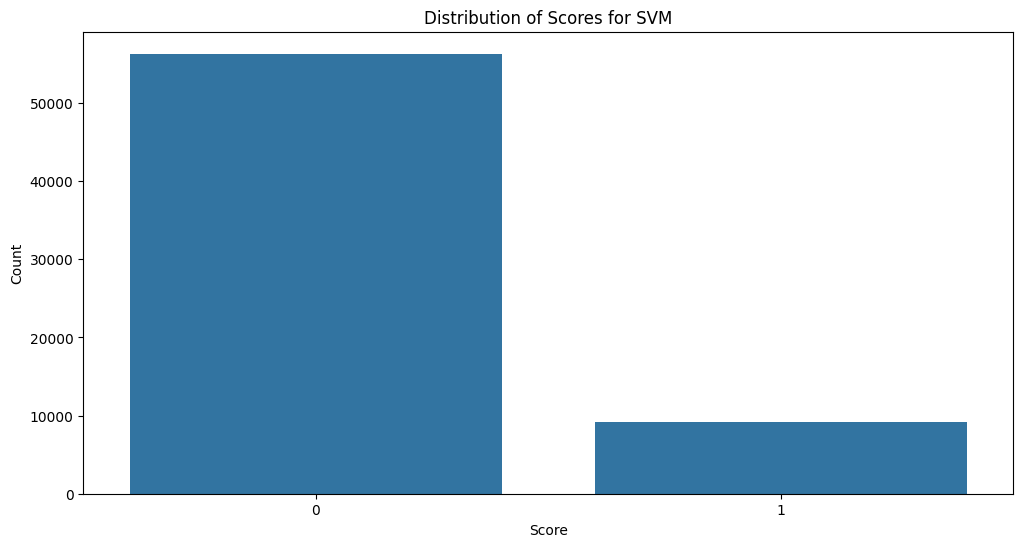

In [40]:
#bar chart of score distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='score_svm', data=expanded_data)
plt.title('Distribution of Scores for SVM')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [41]:
#view score distribution
expanded_data.loc[:,"score_svm"].value_counts()

score_svm
0    56306
1     9229
Name: count, dtype: int64

### Positive Prediction

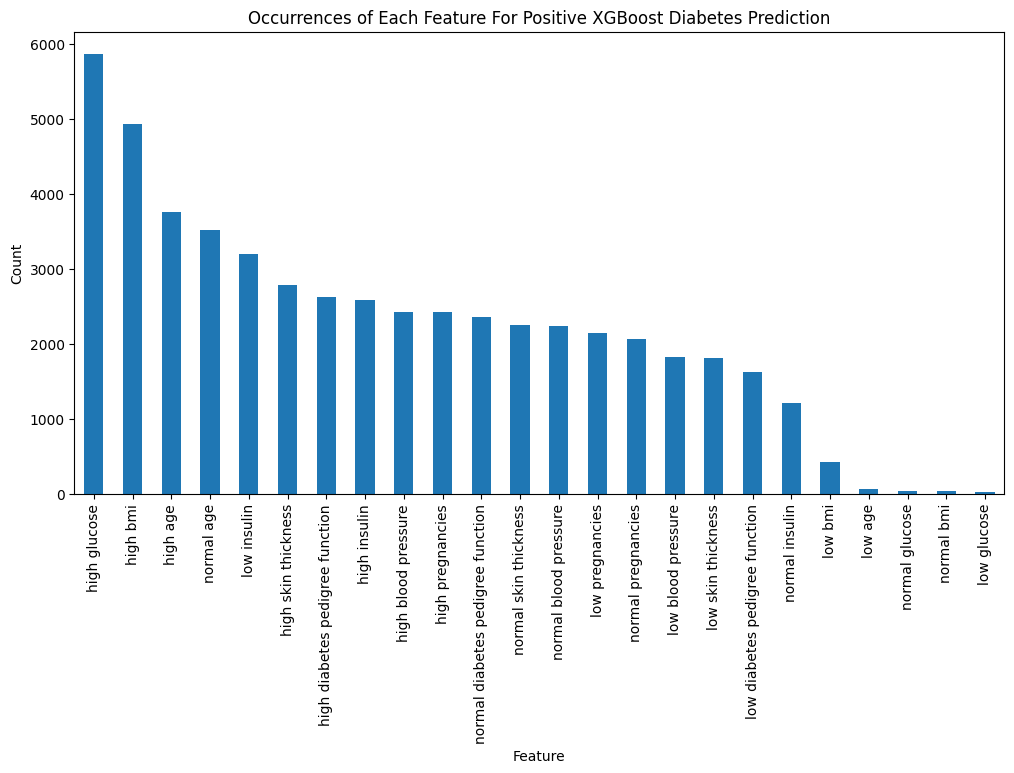

In [42]:
#bar chart of ocurrence of each feature for positive prediction
feature_counts = expanded_data[expanded_data['score_svm']==1].iloc[:,-24:].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
feature_counts.plot(kind='bar')
plt.title('Occurrences of Each Feature For Positive XGBoost Diabetes Prediction')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()

In [ ]:
#apriori analysis for positive prediction
expanded_svm = pd.concat([expanded_data.iloc[:,-24:], expanded_data['score_svm']], axis=1)

frequent_itemsets = apriori(expanded_svm, min_support=0.02, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

In [44]:
#sort rules by lift
rules[rules['consequents']==frozenset({'score_svm'})].sort_values(by="lift", ascending=False)[:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
47,"(high bmi, high glucose)",(score_svm),0.062501,0.140826,0.044175,0.706787,5.018885,0.035373,2.930207,0.854137
30,"(high age, high glucose)",(score_svm),0.062501,0.140826,0.034119,0.545898,3.876417,0.025317,1.892032,0.791499
111,"(normal age, high glucose)",(score_svm),0.062501,0.140826,0.032547,0.520752,3.697852,0.023746,1.792755,0.778212
23,"(high bmi, high age)",(score_svm),0.062501,0.140826,0.028885,0.462158,3.281779,0.020084,1.597448,0.741640
102,"(low insulin, high glucose)",(score_svm),0.062501,0.140826,0.028580,0.457275,3.247106,0.019778,1.583076,0.738170
71,"(normal age, high bmi)",(score_svm),0.062501,0.140826,0.027787,0.444580,3.156957,0.018985,1.546892,0.728789
95,"(high skin thickness, high glucose)",(score_svm),0.062501,0.140826,0.025818,0.413086,2.933317,0.017017,1.463885,0.703029
78,"(high diabetes pedigree function, high glucose)",(score_svm),0.062501,0.140826,0.024704,0.395264,2.806762,0.015903,1.420742,0.686633
84,"(high glucose, high insulin)",(score_svm),0.062501,0.140826,0.024063,0.385010,2.733949,0.015262,1.397054,0.676511
65,"(high bmi, low insulin)",(score_svm),0.062501,0.140826,0.023972,0.383545,2.723547,0.015170,1.393734,0.675021


In [45]:
del rules

### Negative Prediction

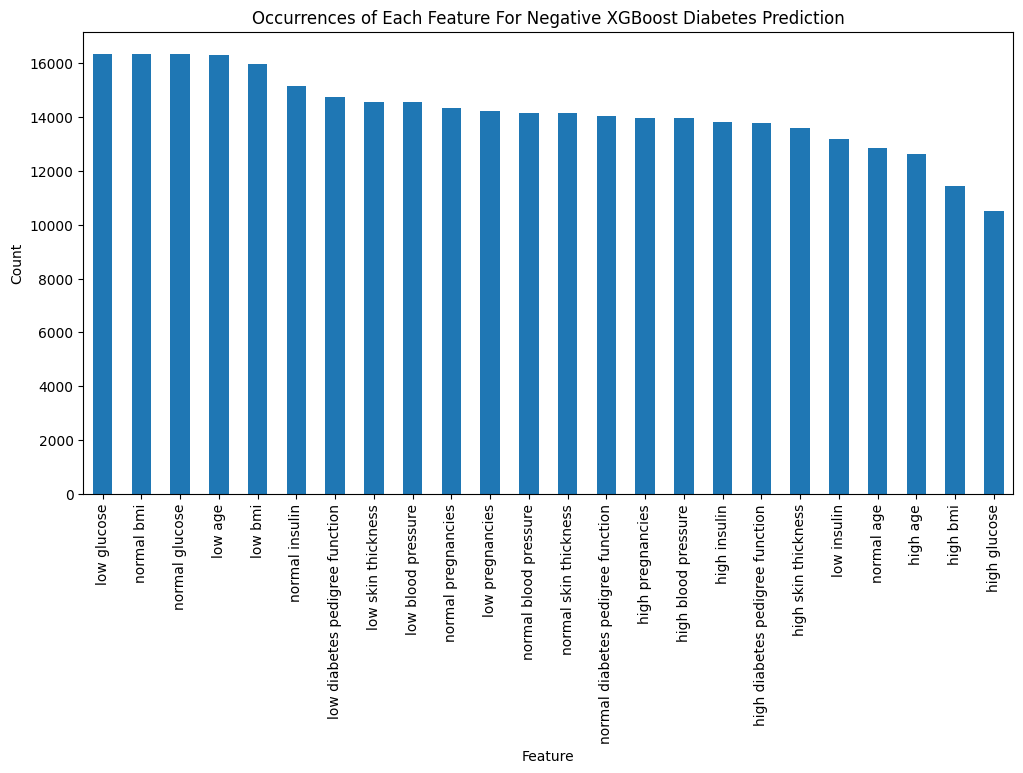

In [46]:
#bar chart of ocurrence of each feature for negative prediction
feature_counts = expanded_data[expanded_data['score_svm']==0].iloc[:,-24:].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
feature_counts.plot(kind='bar')
plt.title('Occurrences of Each Feature For Negative XGBoost Diabetes Prediction')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()

In [ ]:
#apriori analysis for negative prediction
expanded_svm_neg = pd.concat([expanded_data.iloc[:,-24:], 1-expanded_data['score_svm']], axis=1)

frequent_itemsets = apriori(expanded_svm_neg, min_support=0.02, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

In [48]:
#sort rules by lift
rules[rules['consequents']==frozenset({'score_svm'})].sort_values(by="lift", ascending=False)[:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
631,"(normal bmi, low glucose)",(score_svm),0.062501,0.859174,0.062501,1.0,1.163908,0.008802,inf,0.150214
486,"(low bmi, low glucose)",(score_svm),0.062501,0.859174,0.062501,1.0,1.163908,0.008802,inf,0.150214
656,"(normal skin thickness, low glucose)",(score_svm),0.062501,0.859174,0.062501,1.0,1.163908,0.008802,inf,0.150214
644,"(low glucose, normal insulin)",(score_svm),0.062501,0.859174,0.062501,1.0,1.163908,0.008802,inf,0.150214
616,"(low glucose, low skin thickness)",(score_svm),0.062501,0.859174,0.062501,1.0,1.163908,0.008802,inf,0.150214
582,"(low diabetes pedigree function, normal glucose)",(score_svm),0.062501,0.859174,0.062501,1.0,1.163908,0.008802,inf,0.150214
220,"(low glucose, high insulin)",(score_svm),0.062501,0.859174,0.062501,1.0,1.163908,0.008802,inf,0.150214
575,"(normal bmi, low diabetes pedigree function)",(score_svm),0.062501,0.859174,0.062501,1.0,1.163908,0.008802,inf,0.150214
548,"(low glucose, low diabetes pedigree function)",(score_svm),0.062501,0.859174,0.062501,1.0,1.163908,0.008802,inf,0.150214
530,"(low bmi, normal insulin)",(score_svm),0.062501,0.859174,0.062501,1.0,1.163908,0.008802,inf,0.150214


In [49]:
del rules

### Overall

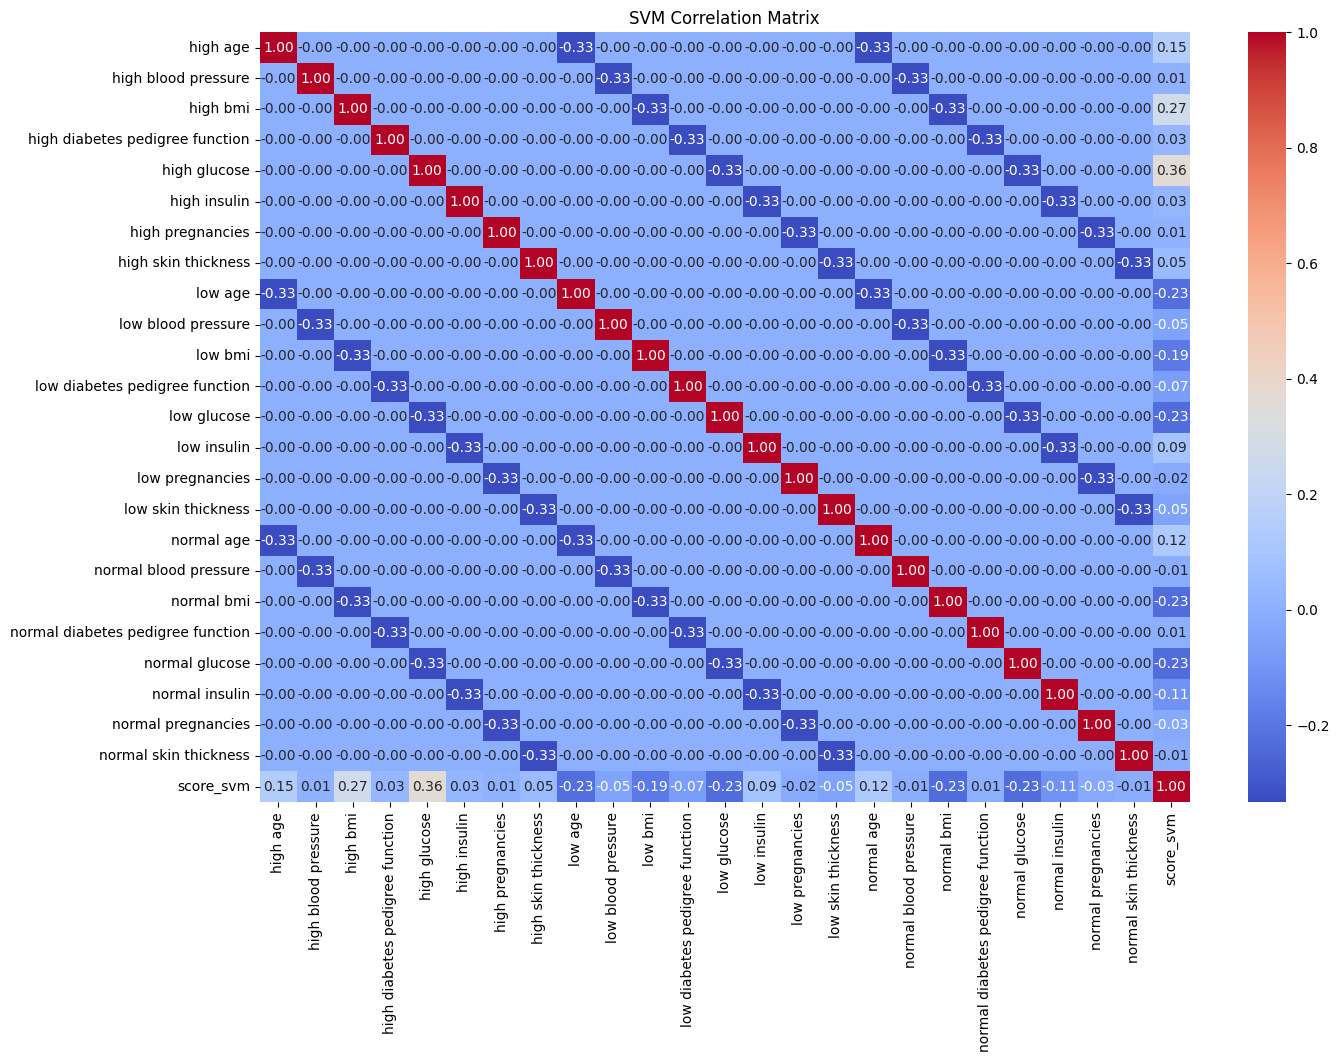

In [50]:
#display correlation matrix
correlation_matrix = expanded_svm.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('SVM Correlation Matrix')
plt.show()

In [51]:
correlation_df[correlation_matrix.iloc[-1].name] = correlation_matrix.iloc[-1].iloc[:-1]

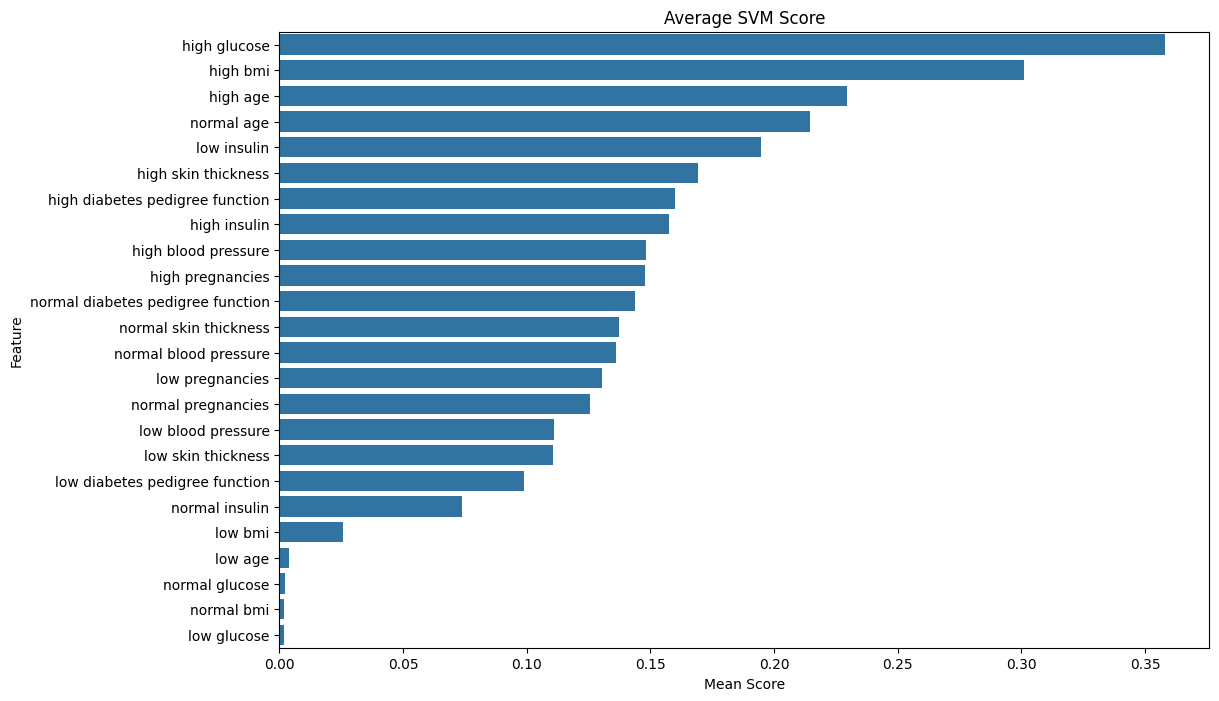

In [52]:
#bar chart of average score for each feature
mean_scores_svm = {}

feature_columns = expanded_data.iloc[:,-24:].columns
for feature in feature_columns:
    filtered_rows = expanded_data[expanded_data[feature] == 1]
    mean_score = filtered_rows['score_svm'].mean()
    mean_scores_svm[feature] = mean_score

mean_scores_df = pd.DataFrame(list(mean_scores_svm.items()), columns=['Feature', 'Mean Score'])


mean_scores_df = mean_scores_df.sort_values(by='Mean Score', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Mean Score', y='Feature', data=mean_scores_df)
plt.title('Average SVM Score')
plt.ylabel('Feature')
plt.show()

In [53]:
mean_scores_df

,Feature,Mean Score
4,high glucose,0.358032
2,high bmi,0.301025
0,high age,0.229309
16,normal age,0.214722
13,low insulin,0.194824
7,high skin thickness,0.169434
3,high diabetes pedigree function,0.159973
5,high insulin,0.157349
1,high blood pressure,0.148193
6,high pregnancies,0.147888


## Naive Bayes

In [54]:
#view descriptive statistics
print(expanded_data['score_nb'].describe())

count    65535.000000
mean         0.080644
std          0.272290
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: score_nb, dtype: float64


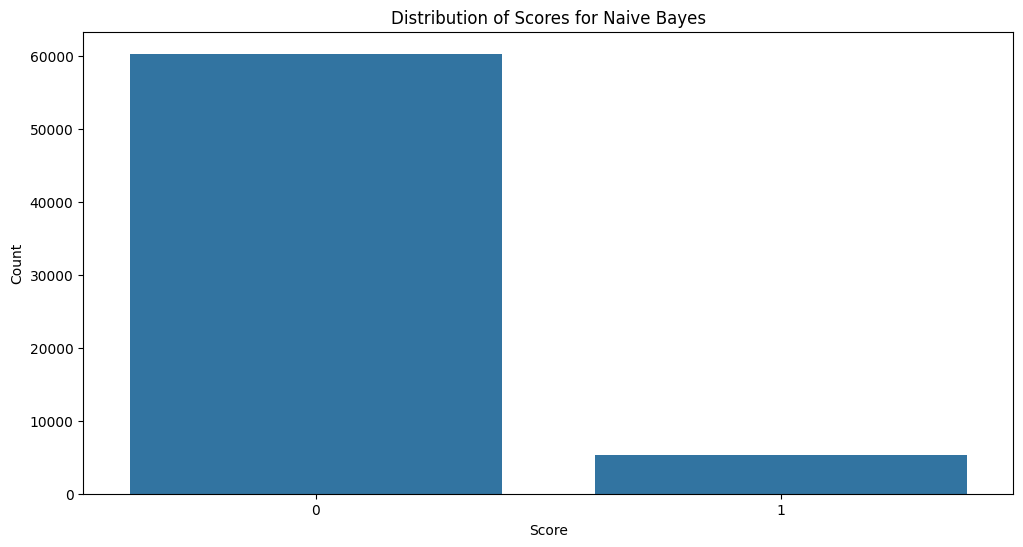

In [55]:
#bar chart of score distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='score_nb', data=expanded_data)
plt.title('Distribution of Scores for Naive Bayes')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [56]:
#view score distribution
expanded_data.loc[:,"score_nb"].value_counts()

score_nb
0    60250
1     5285
Name: count, dtype: int64

### Positive Prediction

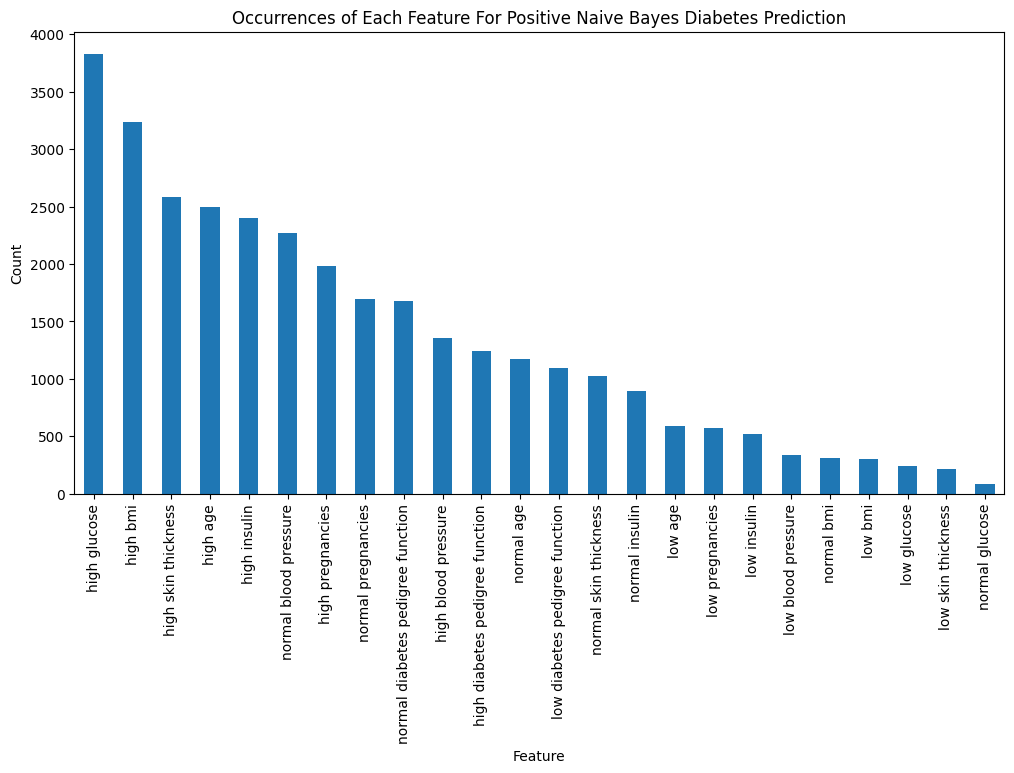

In [57]:
#bar chart of ocurrence of each feature for positive prediction
feature_counts = expanded_data[expanded_data['score_nb']==1].iloc[:,-24:].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
feature_counts.plot(kind='bar')
plt.title('Occurrences of Each Feature For Positive Naive Bayes Diabetes Prediction')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()

In [ ]:
#apriori analysis for positive prediction
expanded_nb = pd.concat([expanded_data.iloc[:,-24:], expanded_data['score_nb']], axis=1)

frequent_itemsets = apriori(expanded_nb, min_support=0.02, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

In [59]:
#sort rules by lift
rules[rules['consequents']==frozenset({'score_nb'})].sort_values(by="lift", ascending=False)[:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
33,"(high bmi, high glucose)",(score_nb),0.062501,0.080644,0.032029,0.512451,6.354491,0.026988,1.885670,0.898807
63,"(high skin thickness, high glucose)",(score_nb),0.062501,0.080644,0.026596,0.425537,5.276741,0.021556,1.600375,0.864523
28,"(high age, high glucose)",(score_nb),0.062501,0.080644,0.024689,0.395020,4.898317,0.019649,1.519646,0.848906
70,"(normal blood pressure, high glucose)",(score_nb),0.062501,0.080644,0.023377,0.374023,4.637961,0.018336,1.468675,0.836681
52,"(high glucose, high insulin)",(score_nb),0.062501,0.080644,0.023362,0.373779,4.634934,0.018321,1.468102,0.836531
44,"(high bmi, high skin thickness)",(score_nb),0.062501,0.080644,0.021637,0.346191,4.292839,0.016597,1.406155,0.818192
21,"(high bmi, high age)",(score_nb),0.062501,0.080644,0.021515,0.344238,4.268620,0.016475,1.401967,0.816782
58,"(high pregnancies, high glucose)",(score_nb),0.062501,0.080644,0.021088,0.337402,4.183853,0.016048,1.387503,0.811719
39,"(high bmi, high insulin)",(score_nb),0.062501,0.080644,0.021042,0.336670,4.174771,0.016002,1.385971,0.811164
7,(high glucose),(score_nb),0.250004,0.080644,0.058457,0.233826,2.899483,0.038296,1.199931,0.873486


In [60]:
del rules

### Negative Prediction

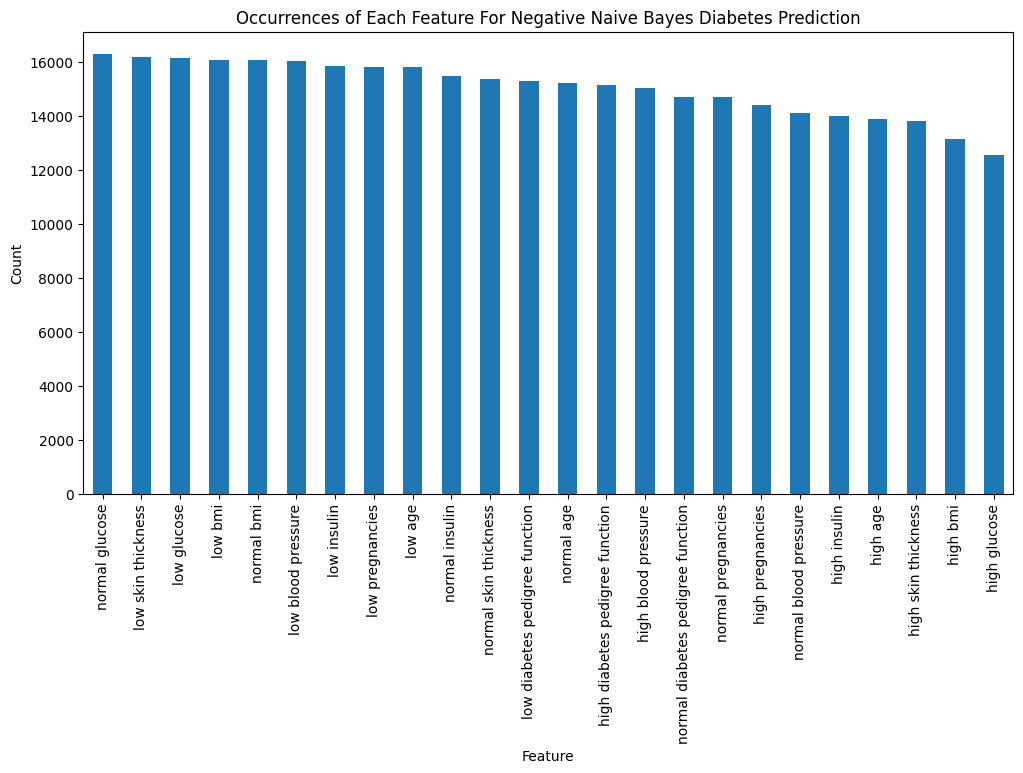

In [61]:
#bar chart of ocurrence of each feature for negative prediction
feature_counts = expanded_data[expanded_data['score_nb']==0].iloc[:,-24:].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
feature_counts.plot(kind='bar')
plt.title('Occurrences of Each Feature For Negative Naive Bayes Diabetes Prediction')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()

In [ ]:
#apriori analysis for negative prediction
expanded_nb_neg = pd.concat([expanded_data.iloc[:,-24:], 1-expanded_data['score_nb']], axis=1)

frequent_itemsets = apriori(expanded_nb_neg, min_support=0.02, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

In [63]:
#sort rules by lift
rules[rules['consequents']==frozenset({'score_nb'})].sort_values(by="lift", ascending=False)[:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
746,"(low insulin, normal glucose)",(score_nb),0.062501,0.919356,0.062501,1.000000,1.087718,0.005040,inf,0.086020
540,"(low bmi, low glucose)",(score_nb),0.062501,0.919356,0.062501,1.000000,1.087718,0.005040,inf,0.086020
826,"(normal glucose, low skin thickness)",(score_nb),0.062501,0.919356,0.062501,1.000000,1.087718,0.005040,inf,0.086020
815,"(normal bmi, low skin thickness)",(score_nb),0.062501,0.919356,0.062501,1.000000,1.087718,0.005040,inf,0.086020
437,"(low age, normal glucose)",(score_nb),0.062501,0.919356,0.062501,1.000000,1.087718,0.005040,inf,0.086020
924,"(normal insulin, normal glucose)",(score_nb),0.062501,0.919356,0.062501,1.000000,1.087718,0.005040,inf,0.086020
887,"(normal bmi, normal glucose)",(score_nb),0.062501,0.919356,0.062501,1.000000,1.087718,0.005040,inf,0.086020
511,"(low blood pressure, normal glucose)",(score_nb),0.062501,0.919356,0.062501,1.000000,1.087718,0.005040,inf,0.086020
558,"(low bmi, low skin thickness)",(score_nb),0.062501,0.919356,0.062501,1.000000,1.087718,0.005040,inf,0.086020
578,"(low bmi, normal glucose)",(score_nb),0.062501,0.919356,0.062501,1.000000,1.087718,0.005040,inf,0.086020


In [64]:
del rules

### Overall

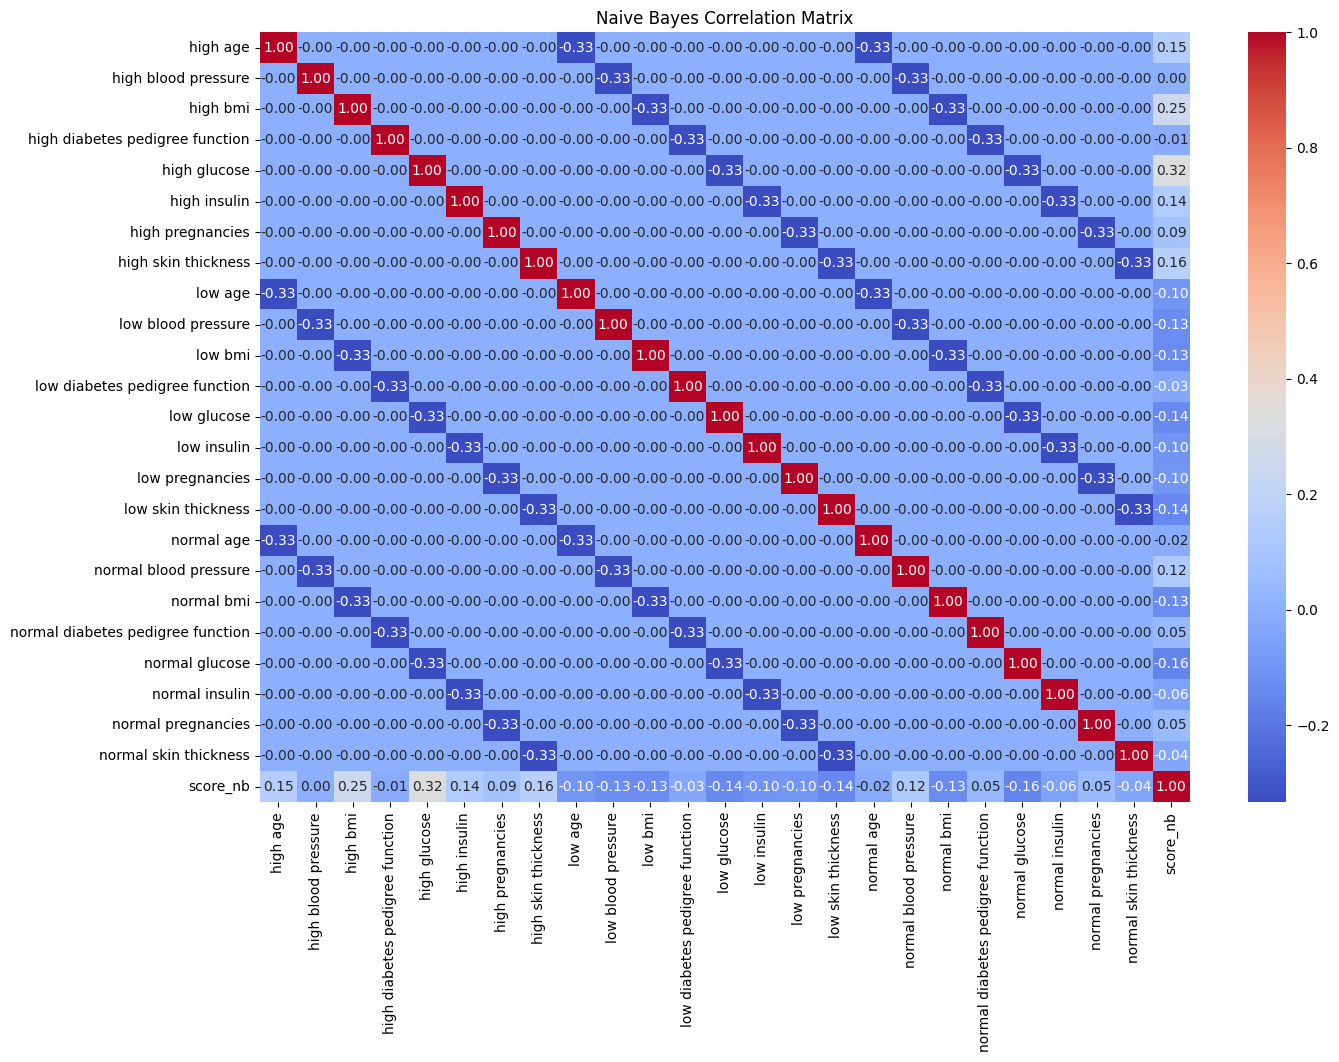

In [65]:
#display correlation matrix
correlation_matrix = expanded_nb.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Naive Bayes Correlation Matrix')
plt.show()

In [66]:
correlation_df[correlation_matrix.iloc[-1].name] = correlation_matrix.iloc[-1].iloc[:-1]

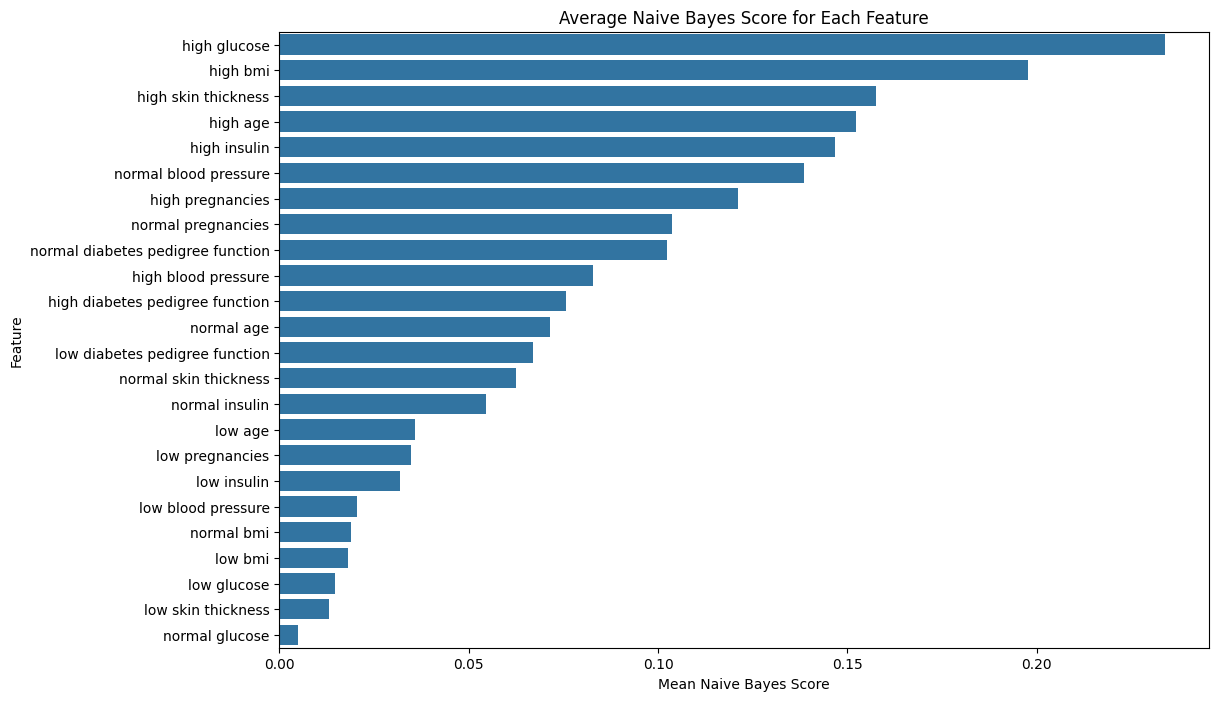

In [67]:
#bar chart of average score for each feature
mean_scores_nb = {}

feature_columns = expanded_data.iloc[:,-24:].columns
for feature in feature_columns:
    filtered_rows = expanded_data[expanded_data[feature] == 1]
    mean_score = filtered_rows['score_nb'].mean()
    mean_scores_nb[feature] = mean_score

mean_scores_df = pd.DataFrame(list(mean_scores_nb.items()), columns=['Feature', 'Mean Score'])


mean_scores_df = mean_scores_df.sort_values(by='Mean Score', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Mean Score', y='Feature', data=mean_scores_df)
plt.title('Average Naive Bayes Score for Each Feature')
plt.xlabel('Mean Naive Bayes Score')
plt.ylabel('Feature')
plt.show()

In [68]:
mean_scores_df

,Feature,Mean Score
4,high glucose,0.233826
2,high bmi,0.197693
7,high skin thickness,0.157532
0,high age,0.152161
5,high insulin,0.146790
17,normal blood pressure,0.138428
6,high pregnancies,0.121216
22,normal pregnancies,0.103638
19,normal diabetes pedigree function,0.102417
1,high blood pressure,0.082764


## Neural Networks

In [69]:
#view descriptive statistics
print(expanded_data['score_nn'].describe())

count    65535.000000
mean         0.227906
std          0.158157
min          0.022283
25%          0.104474
50%          0.181139
75%          0.312011
max          0.841170
Name: score_nn, dtype: float64


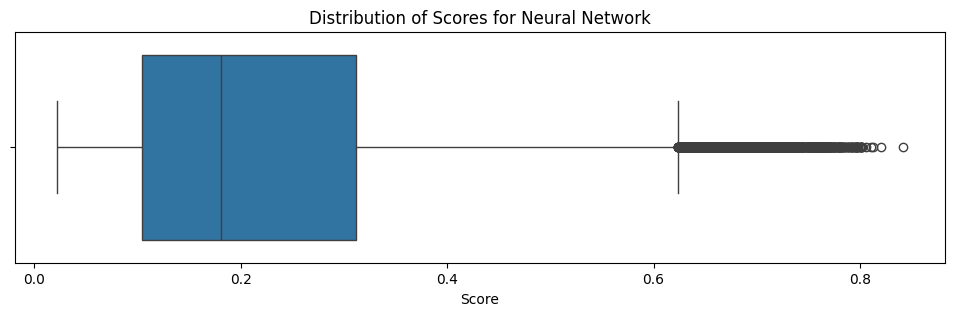

In [70]:
#box and whisker plot of score distribution
plt.figure(figsize=(12, 3))
sns.boxplot(x=expanded_data['score_nn'])
plt.title('Distribution of Scores for Neural Network')
plt.xlabel('Score')
plt.show()

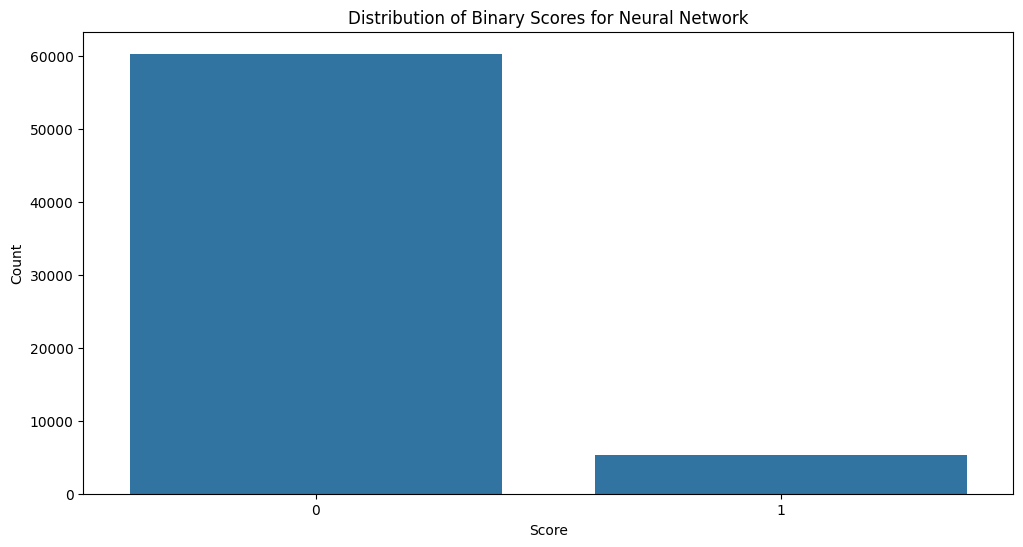

In [71]:
#bar chart of score distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='score_nn_binary', data=expanded_data)
plt.title('Distribution of Binary Scores for Neural Network')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [72]:
#view score distribution
expanded_data.loc[:,"score_nn_binary"].value_counts()

score_nn_binary
0    60283
1     5252
Name: count, dtype: int64

### Positive Prediction

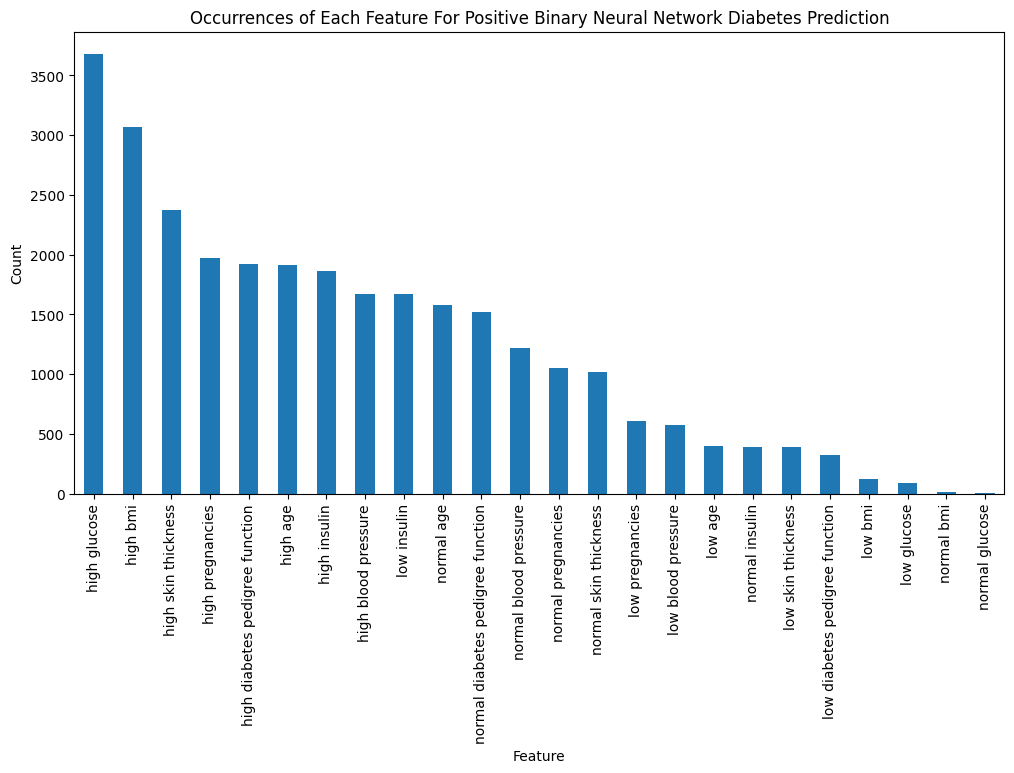

In [73]:
#bar chart of ocurrence of each feature for positive prediction
feature_counts = expanded_data[expanded_data['score_nn_binary']==1].iloc[:,-24:].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
feature_counts.plot(kind='bar')
plt.title('Occurrences of Each Feature For Positive Binary Neural Network Diabetes Prediction')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()

In [ ]:
#apriori analysis for positive prediction
expanded_nn = pd.concat([expanded_data.iloc[:,-24:], expanded_data['score_nn_binary']], axis=1)

frequent_itemsets = apriori(expanded_nn, min_support=0.02, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

In [75]:
#sort rules by lift
rules[rules['consequents']==frozenset({'score_nn_binary'})].sort_values(by="lift", ascending=False)[:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
23,"(high bmi, high glucose)",(score_nn_binary),0.062501,0.08014,0.031388,0.502197,6.266469,0.026379,1.847840,0.896449
35,"(high skin thickness, high glucose)",(score_nn_binary),0.062501,0.08014,0.022934,0.366943,4.578757,0.017925,1.453045,0.833708
29,"(high bmi, high skin thickness)",(score_nn_binary),0.062501,0.08014,0.020035,0.320557,3.999939,0.015026,1.353843,0.799997
9,(high glucose),(score_nn_binary),0.250004,0.08014,0.056184,0.224731,2.804222,0.036148,1.186504,0.857864
4,(high bmi),(score_nn_binary),0.250004,0.08014,0.046815,0.187256,2.336598,0.026779,1.131795,0.762707
14,(high skin thickness),(score_nn_binary),0.250004,0.08014,0.036286,0.145142,1.811092,0.016251,1.076037,0.597132
13,(high pregnancies),(score_nn_binary),0.250004,0.08014,0.030106,0.120422,1.502643,0.010071,1.045797,0.446010
7,(high diabetes pedigree function),(score_nn_binary),0.250004,0.08014,0.029313,0.117249,1.463039,0.009277,1.042037,0.421991
1,(high age),(score_nn_binary),0.250004,0.08014,0.029160,0.116638,1.455423,0.009125,1.041317,0.417222
11,(high insulin),(score_nn_binary),0.250004,0.08014,0.028428,0.113708,1.418866,0.008392,1.037875,0.393618


In [76]:
del rules

### Negative Prediction

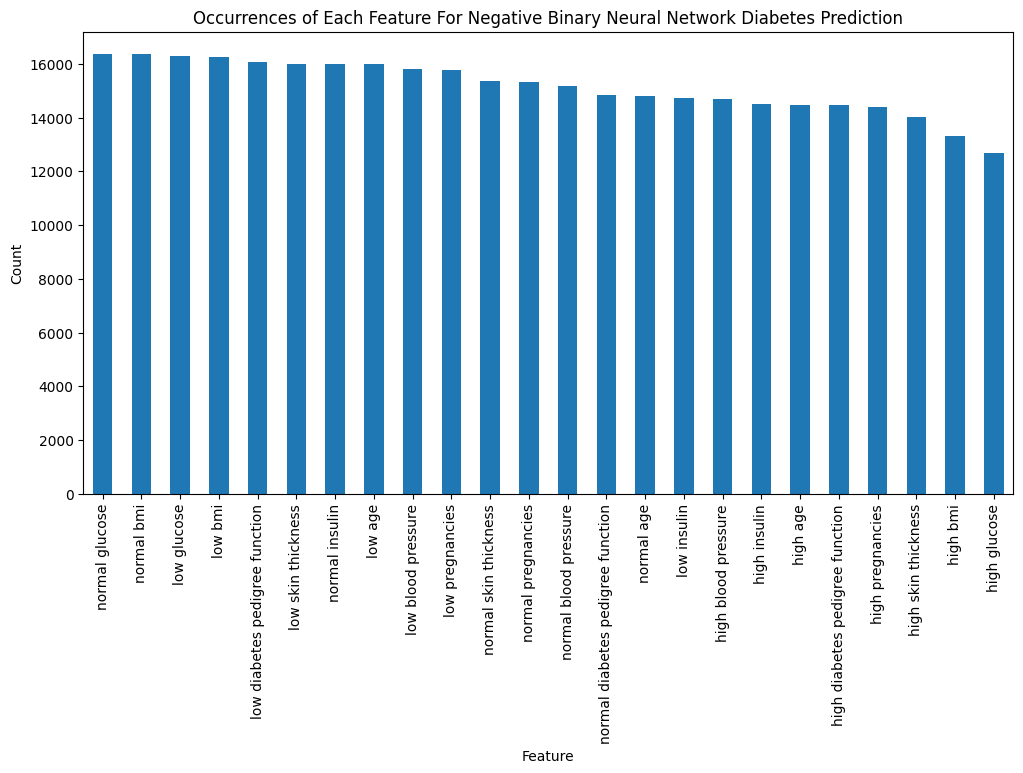

In [77]:
#bar chart of ocurrence of each feature for negative prediction
feature_counts = expanded_data[expanded_data['score_nn_binary']==0].iloc[:,-24:].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
feature_counts.plot(kind='bar')
plt.title('Occurrences of Each Feature For Negative Binary Neural Network Diabetes Prediction')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()

In [ ]:
#apriori analysis for negative prediction
expanded_nn_neg = pd.concat([expanded_data.iloc[:,-24:], 1-expanded_data['score_nn_binary']], axis=1)

frequent_itemsets = apriori(expanded_nn_neg, min_support=0.02, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

In [79]:
#sort rules by lift
rules[rules['consequents']==frozenset({'score_nn_binary'})].sort_values(by="lift", ascending=False)[:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
807,"(normal bmi, normal blood pressure)",(score_nn_binary),0.062501,0.91986,0.062501,1.0,1.087122,0.005009,inf,0.085483
753,"(normal bmi, low skin thickness)",(score_nn_binary),0.062501,0.91986,0.062501,1.0,1.087122,0.005009,inf,0.085483
429,"(low blood pressure, low glucose)",(score_nn_binary),0.062501,0.91986,0.062501,1.0,1.087122,0.005009,inf,0.085483
417,"(low blood pressure, low bmi)",(score_nn_binary),0.062501,0.91986,0.062501,1.0,1.087122,0.005009,inf,0.085483
816,"(normal blood pressure, normal glucose)",(score_nn_binary),0.062501,0.91986,0.062501,1.0,1.087122,0.005009,inf,0.085483
645,"(normal bmi, low glucose)",(score_nn_binary),0.062501,0.91986,0.062501,1.0,1.087122,0.005009,inf,0.085483
789,"(normal age, normal glucose)",(score_nn_binary),0.062501,0.91986,0.062501,1.0,1.087122,0.005009,inf,0.085483
393,"(low age, normal glucose)",(score_nn_binary),0.062501,0.91986,0.062501,1.0,1.087122,0.005009,inf,0.085483
589,"(normal bmi, low diabetes pedigree function)",(score_nn_binary),0.062501,0.91986,0.062501,1.0,1.087122,0.005009,inf,0.085483
764,"(normal glucose, low skin thickness)",(score_nn_binary),0.062501,0.91986,0.062501,1.0,1.087122,0.005009,inf,0.085483


In [80]:
del rules

### Overall

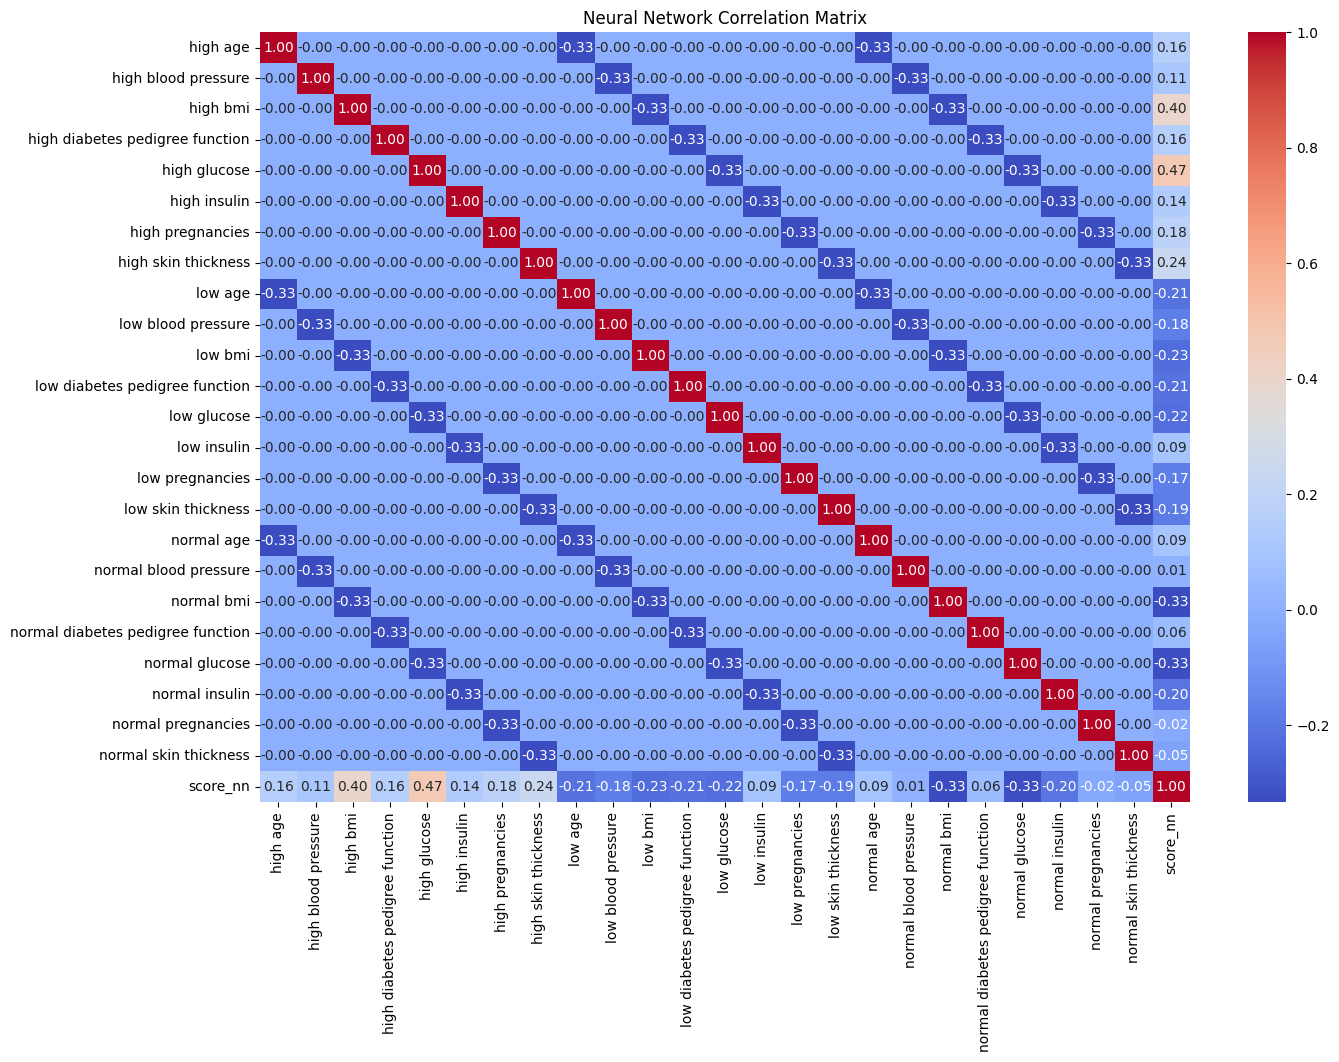

In [81]:
#display correlation matrix
expanded_nn_nonbinary =  pd.concat([expanded_data.iloc[:,-24:], expanded_data['score_nn']], axis=1)

correlation_matrix = expanded_nn_nonbinary.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Neural Network Correlation Matrix')
plt.show()

In [82]:
correlation_df[correlation_matrix.iloc[-1].name] = correlation_matrix.iloc[-1].iloc[:-1]

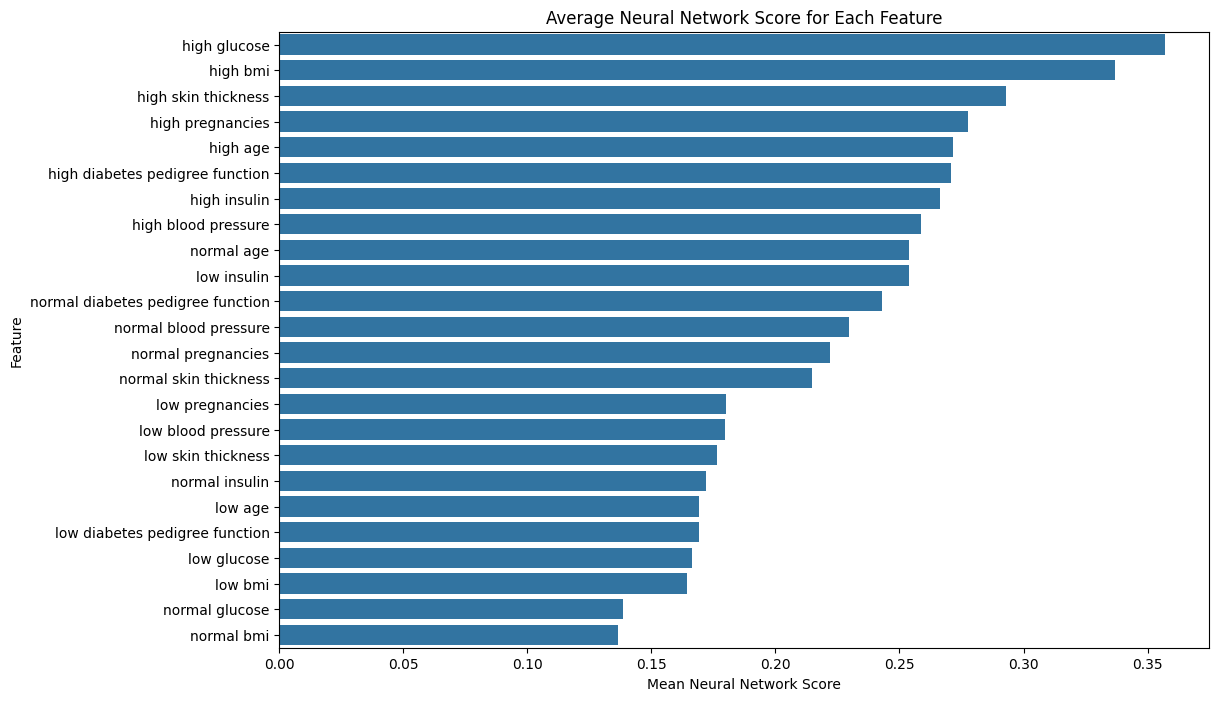

In [83]:
#bar chart of average score for each feature
mean_scores_nn = {}

feature_columns = expanded_data.iloc[:,-24:].columns
for feature in feature_columns:
    filtered_rows = expanded_data[expanded_data[feature] == 1]
    mean_score = filtered_rows['score_nn'].mean()
    mean_scores_nn[feature] = mean_score

mean_scores_df = pd.DataFrame(list(mean_scores_nn.items()), columns=['Feature', 'Mean Score'])


mean_scores_df = mean_scores_df.sort_values(by='Mean Score', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Mean Score', y='Feature', data=mean_scores_df)
plt.title('Average Neural Network Score for Each Feature')
plt.xlabel('Mean Neural Network Score')
plt.ylabel('Feature')
plt.show()

In [84]:
mean_scores_df

,Feature,Mean Score
4,high glucose,0.357034
2,high bmi,0.336811
7,high skin thickness,0.293126
6,high pregnancies,0.277539
0,high age,0.271498
3,high diabetes pedigree function,0.270926
5,high insulin,0.266210
1,high blood pressure,0.258667
16,normal age,0.253877
13,low insulin,0.253813


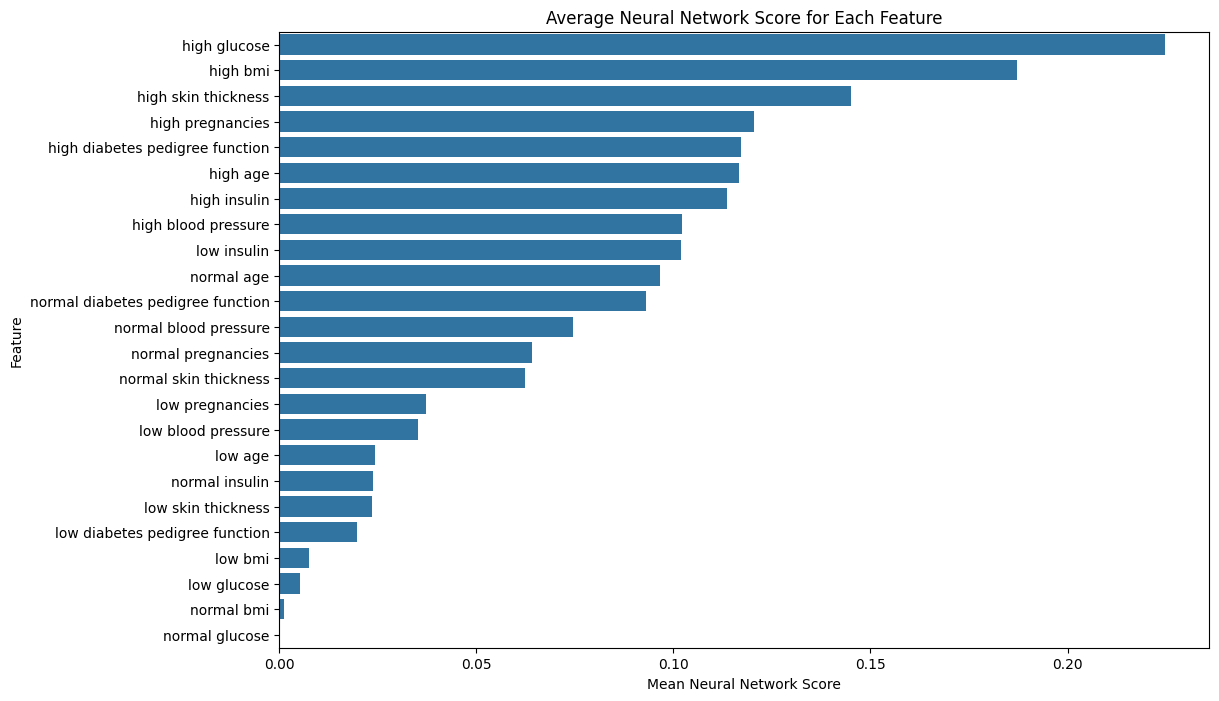

In [85]:
#bar chart of average score for each feature (binary)
mean_scores_nn_binary = {}

feature_columns = expanded_data.iloc[:,-24:].columns
for feature in feature_columns:
    filtered_rows = expanded_data[expanded_data[feature] == 1]
    mean_score = filtered_rows['score_nn_binary'].mean()
    mean_scores_nn_binary[feature] = mean_score

mean_scores_df = pd.DataFrame(list(mean_scores_nn_binary.items()), columns=['Feature', 'Mean Score'])


mean_scores_df = mean_scores_df.sort_values(by='Mean Score', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Mean Score', y='Feature', data=mean_scores_df)
plt.title('Average Neural Network Score for Each Feature')
plt.xlabel('Mean Neural Network Score')
plt.ylabel('Feature')
plt.show()

## Overall Diagrams

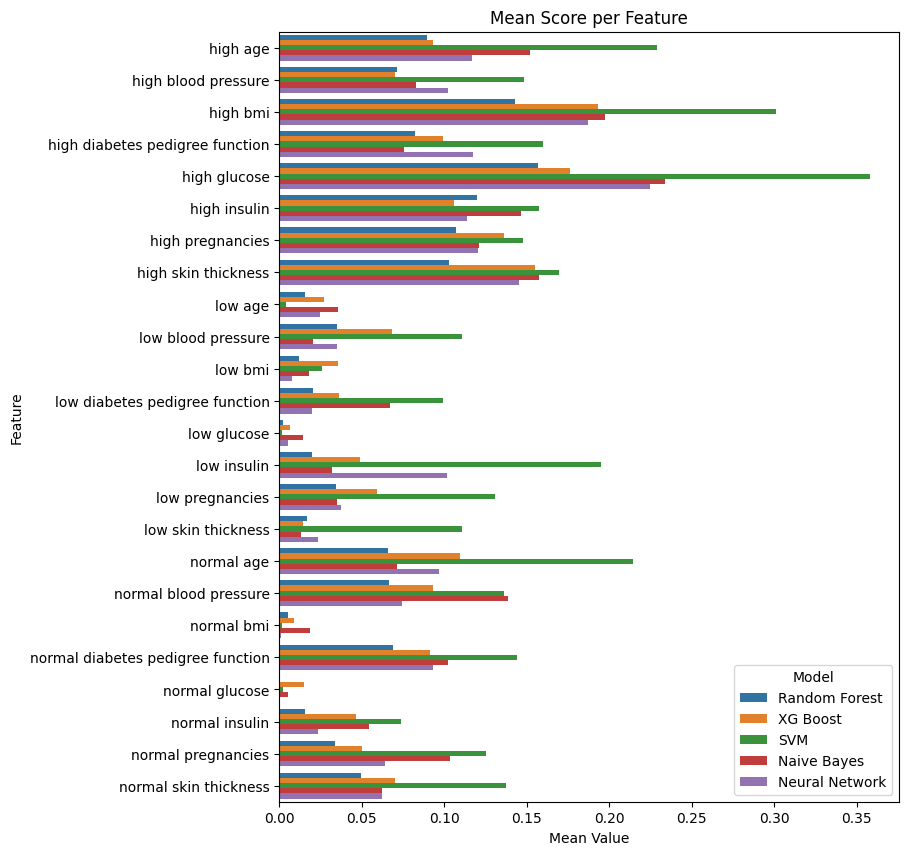

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.DataFrame(list(mean_scores_rf.items()), columns=['Feature', 'Mean Score'])
df1['Model'] = 'Random Forest'

df2 = pd.DataFrame(list(mean_scores_xgb.items()), columns=['Feature', 'Mean Score'])
df2['Model'] = 'XG Boost'

df3 = pd.DataFrame(list(mean_scores_svm.items()), columns=['Feature', 'Mean Score'])
df3['Model'] = 'SVM'

df4 = pd.DataFrame(list(mean_scores_nb.items()), columns=['Feature', 'Mean Score'])
df4['Model'] = 'Naive Bayes'

df5 = pd.DataFrame(list(mean_scores_nn_binary.items()), columns=['Feature', 'Mean Score'])
df5['Model'] = 'Neural Network'

df = pd.concat([df1, df2, df3, df4, df5])

plt.figure(figsize=(8, 10))
sns.barplot(data=df, y='Feature', x='Mean Score', hue='Model')
plt.title('Mean Score per Feature')
plt.ylabel('Feature')
plt.xlabel('Mean Value')
#plt.xticks(rotation=90)
plt.show()

In [88]:
correlation_df

,score_rf,score_xgb,score_svm,score_nb,score_nn
high age,0.080446,0.035505,0.146867,0.151643,0.159131
high blood pressure,0.035757,-0.013736,0.012229,0.004495,0.112294
high bmi,0.214363,0.252983,0.265904,0.248190,0.397562
high diabetes pedigree function,0.063270,0.048212,0.031782,-0.010647,0.157044
high glucose,0.248108,0.215523,0.360525,0.324805,0.471385
high insulin,0.157057,0.063434,0.027425,0.140255,0.139828
high pregnancies,0.124224,0.128691,0.011723,0.086028,0.181185
high skin thickness,0.114192,0.169327,0.047484,0.163032,0.238087
low age,-0.102719,-0.107186,-0.227262,-0.095028,-0.214448
low blood pressure,-0.054534,-0.018898,-0.049467,-0.127253,-0.176493
